### 1. Preparations

#### 1.1. Basic importations

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando estilos
sns.set(style='white')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12

#### 1.2. Creating dataframe

In [3]:
directory = '..\\data\\raw'
parquet_file = [file for file in os.listdir(directory) if file.endswith('.parquet')][0]
parquet_dir = os.path.join(directory, parquet_file)
df = pd.read_parquet(parquet_dir)

### 2. Checking data conditions

#### 2.1. Nulls and missing

In [4]:
df.head(2)

country                                        description   designation  \
0     Italy  Aromas include tropical fruit, broom, brimston...  Vulkà Bianco   
1  Portugal  This is ripe and fruity, a wine that is smooth...      Avidagos   

   points  price           province region_1 region_2    taster_name  \
0      87    NaN  Sicily & Sardinia     Etna     None  Kerin O’Keefe   
1      87   15.0              Douro     None     None     Roger Voss   

  taster_twitter_handle                                          title  \
0          @kerinokeefe              Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger  Quinta dos Avidagos 2011 Avidagos Red (Douro)   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos

Checking % of NaN values

In [5]:
for column in df.columns:
    nan_rows = round((df[column].isna().sum()/df.shape[0])*100,2).astype(str)+'%' # type: ignore
    print(f"Column name: {column} has {nan_rows} of NaN values")

Column name: country has 0.02% of NaN values
Column name: description has 0.0% of NaN values
Column name: designation has 29.62% of NaN values
Column name: points has 0.0% of NaN values
Column name: price has 8.08% of NaN values
Column name: province has 0.02% of NaN values
Column name: region_1 has 16.49% of NaN values
Column name: region_2 has 60.32% of NaN values
Column name: taster_name has 63.07% of NaN values
Column name: taster_twitter_handle has 64.84% of NaN values
Column name: title has 53.73% of NaN values
Column name: variety has 0.0% of NaN values
Column name: winery has 0.0% of NaN values


Checking 'region_1' and 'region_2'

In [6]:
print(f"Region 1 has {df.region_1.nunique()} unique values")
print(f"Region 2 has {df.region_2.nunique()} unique values")

Region 1 has 1332 unique values
Region 2 has 18 unique values


In [7]:
df.loc[(df['region_1']!= df['region_2'] ) & (df['region_2'].notnull()), ['region_1','region_2']]

region_1                 region_2
10            Napa Valley                     Napa
12       Alexander Valley                   Sonoma
21                 Oregon             Oregon Other
23            Paso Robles            Central Coast
25           Sonoma Coast                   Sonoma
...                   ...                      ...
280860  Santa Ynez Valley            Central Coast
280863         California         California Other
280867         California         California Other
280885    Anderson Valley  Mendocino/Lake Counties
280887        Napa Valley                     Napa

[100893 rows x 2 columns]

Checking NaN values in 'price'

In [8]:
df.price.isna().sum()

22691

In [9]:
df_temp = df[df['price'].isna()]
print('Distribuition of NaN values for "price" = null\n')
for column in df.columns:
    nan_rows = round((df_temp[column].isna().sum()/df_temp.shape[0])*100,2).astype(str)+'%' # type: ignore
    print(f"Column name: {column} has {nan_rows} of NaN values")

Distribuition of NaN values for "price" = null

Column name: country has 0.02% of NaN values
Column name: description has 0.0% of NaN values
Column name: designation has 26.93% of NaN values
Column name: points has 0.0% of NaN values
Column name: price has 100.0% of NaN values
Column name: province has 0.02% of NaN values
Column name: region_1 has 17.14% of NaN values
Column name: region_2 has 97.94% of NaN values
Column name: taster_name has 68.06% of NaN values
Column name: taster_twitter_handle has 68.27% of NaN values
Column name: title has 60.35% of NaN values
Column name: variety has 0.0% of NaN values
Column name: winery has 0.0% of NaN values


Checking NaN values in 'title'

In [10]:
df.title.isna().sum()

150930

In [11]:
df_temp = df[df['title'].isna()]
print('Distribuition of NaN values for "title" = null\n')
for column in df.columns:
    nan_rows = round((df_temp[column].isna().sum()/df_temp.shape[0])*100,2).astype(str)+'%' # type: ignore
    print(f"Column name: {column} has {nan_rows} of NaN values")

Distribuition of NaN values for "title" = null

Column name: country has 0.0% of NaN values
Column name: description has 0.0% of NaN values
Column name: designation has 30.3% of NaN values
Column name: points has 0.0% of NaN values
Column name: price has 9.07% of NaN values
Column name: province has 0.0% of NaN values
Column name: region_1 has 16.6% of NaN values
Column name: region_2 has 59.62% of NaN values
Column name: taster_name has 100.0% of NaN values
Column name: taster_twitter_handle has 100.0% of NaN values
Column name: title has 100.0% of NaN values
Column name: variety has 0.0% of NaN values
Column name: winery has 0.0% of NaN values


#### 2.2. Datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                280900 non-null  object 
 12  winery                 280901 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


### 3. Checking data distribuitions

#### 3.1. 'points'

##### 3.1.1. Visualizando a distribuição de 'points'

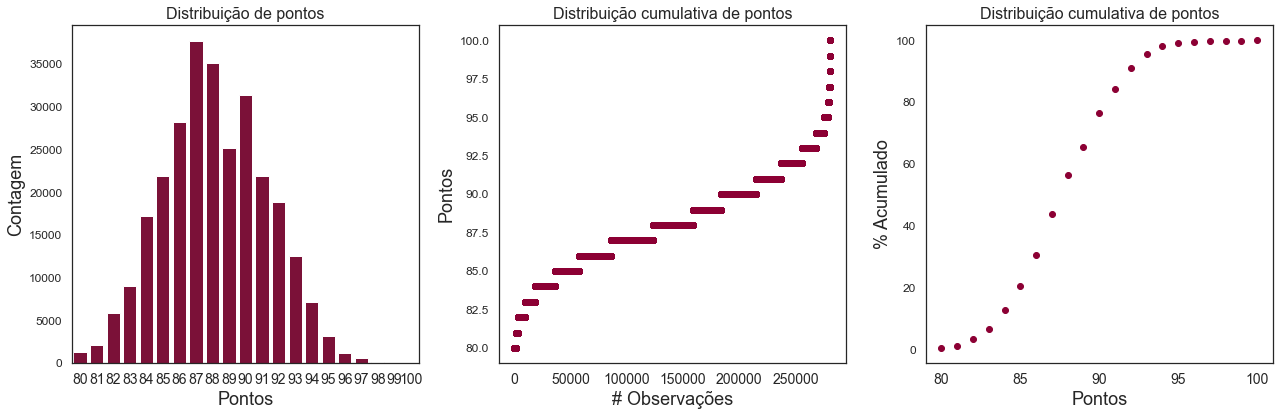

In [13]:
# Calcular a soma acumulada
cum_sum = df.groupby('points').agg(frequency = ('points', 'count')).reset_index()
total = cum_sum.frequency.sum()
cum_sum['cumulative_sum'] = round((cum_sum['frequency'].cumsum()/len(df))*100,2)


#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize= (18,6))

#Primeiro plot - histograma de pontos
sns.countplot(data = df, x = 'points', color='#8c0034', ax = axes[0])
axes[0].set_title('Distribuição de pontos')
axes[0].set_xlabel('Pontos')
axes[0].set_ylabel('Contagem')
plt.tight_layout()

#Segundo plot - Preços vs nota
axes[1].scatter(data = df.sort_values(by='points', ascending=True), x = range(df.shape[0]) , y = 'points',color = '#8c0034')
axes[1].set_title('Distribuição cumulativa de pontos')
axes[1].set_xlabel('# Observações')
axes[1].set_ylabel('Pontos')

# Terceiro plot
axes[2].scatter(data = cum_sum, x = 'points', y= 'cumulative_sum', color = '#8c0034')
axes[2].set_title('Distribuição cumulativa de pontos')
axes[2].set_xlabel('Pontos')
axes[2].set_ylabel('% Acumulado')
plt.tight_layout()
plt.show()

* A distribuição de pontos se assemelha bastante à uma distribuição normal
* Apenas poucos vinhos tem menos de 82 pontos e mais de 95

##### 3.1.2. Agrupando 'points' em quartis

In [14]:
quartis = df.points.quantile(q = [.2,.4,.6,.8])
bins = [df['points'].min() - 1] + list(quartis) + [df['points'].max() + 1]
df['points_cluster'] = pd.cut(df['points'], bins=bins)

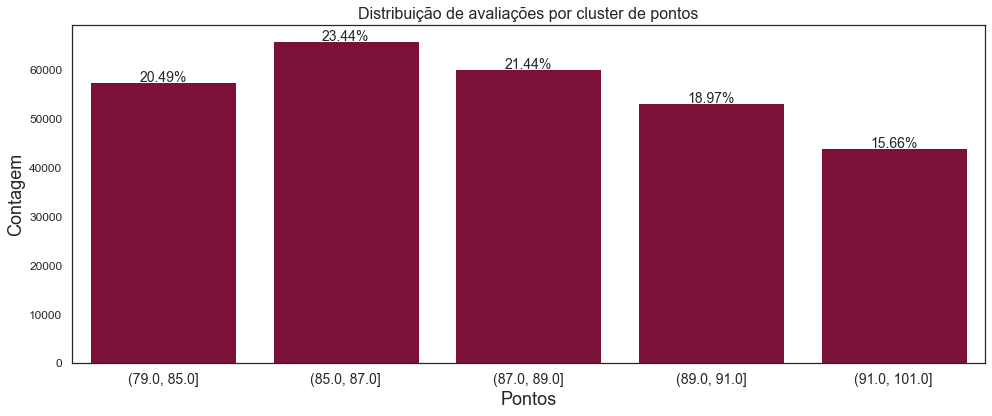

In [17]:
#Primeiro plot - histograma de pontos
total = len(df)
plt.figure(figsize=(14,6))
ax = sns.countplot(data = df, x = 'points_cluster', color = '#8c0034')
ax.set_title('Distribuição de avaliações por cluster de pontos')
ax.set_xlabel('Pontos')
ax.set_ylabel('Contagem')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height,
            '{:1.2f}%'.format(100 * height/total),
            ha="center")
plt.tight_layout()

65% dos dados aproximadamente estão localizados até 89 pontos

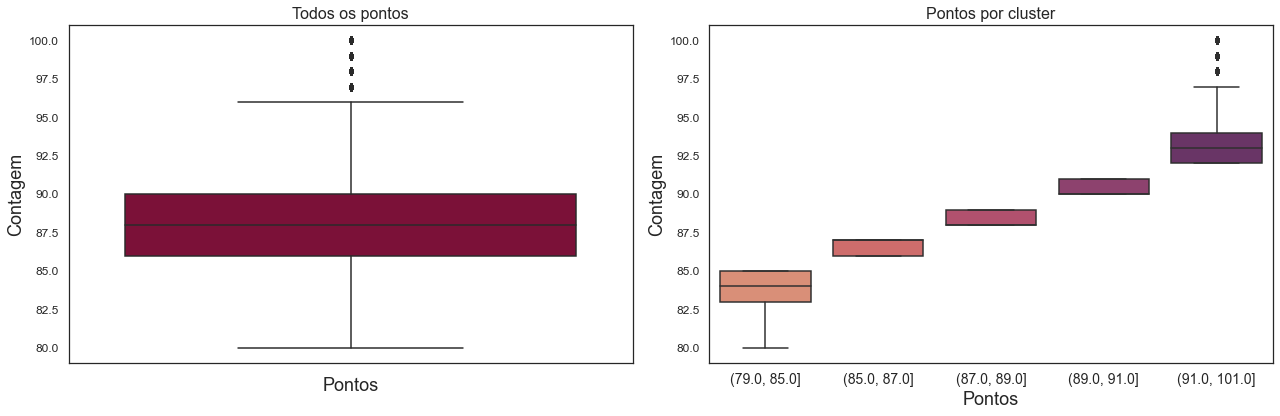

In [18]:
#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize= (18,6))

#Primeiro plot - histograma de pontos
sns.boxplot(data = df, y = 'points',  ax = axes[0], color = '#8c0034')
axes[0].set_title('Todos os pontos')
axes[0].set_xlabel('Pontos')
axes[0].set_ylabel('Contagem')

#Segundo plot - por cluster
sns.boxplot(data = df, y = 'points', x = 'points_cluster',  ax = axes[1], palette='flare')
axes[1].set_title('Pontos por cluster')
axes[1].set_xlabel('Pontos')
axes[1].set_ylabel('Contagem')
plt.tight_layout()

#### 3.2. 'price'

##### 3.2.1. Visualizando a distribuição de 'price'

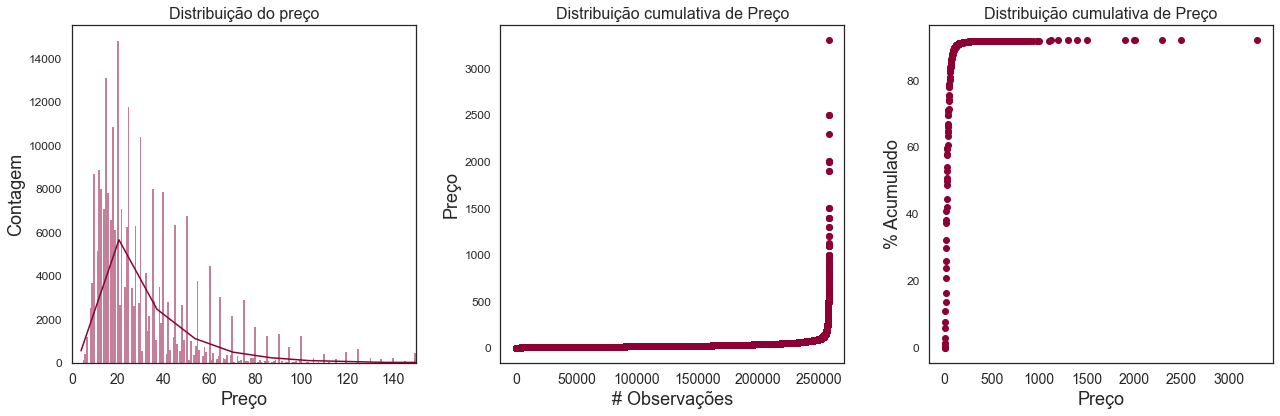

In [19]:

# Calcular a soma acumulada
cum_sum = df.groupby('price').agg(frequency = ('price', 'count')).reset_index()
total = cum_sum.frequency.sum()
cum_sum['cumulative_sum'] = round((cum_sum['frequency'].cumsum()/len(df))*100,2)


#Plotagem
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize= (18,6))

#Primeiro plot - histograma de Preço
sns.histplot(data = df, x = 'price', color='#8c0034', ax = axes[0], kde = True)

axes[0].set_title('Distribuição do preço')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Contagem')
axes[0].set_xlim([0,150])

#Segundo plot - Preços vs nota
axes[1].scatter(data = df.sort_values(by='price', ascending=True), x = range(df.shape[0]) , y = 'price',color = '#8c0034')
axes[1].set_title('Distribuição cumulativa de Preço')
axes[1].set_xlabel('# Observações')
axes[1].set_ylabel('Preço')

# Terceiro plot
axes[2].scatter(data = cum_sum, x = 'price', y= 'cumulative_sum', color = '#8c0034')
axes[2].set_title('Distribuição cumulativa de Preço')
axes[2].set_xlabel('Preço')
axes[2].set_ylabel('% Acumulado')
plt.tight_layout()
plt.show()

##### 3.2.2. Filtrando os dados outliers de 'price'

In [ ]:
def find_outliers_IQR(df, column):

    q1=df[column].quantile(0.25)

    q3=df[column].quantile(0.75)

    IQR=q3-q1

    outliers = df.loc[((df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR)))]

    print('Non-outliers observations: ' + str(len(df)))
    
    print(f'number of outliers observations: {str(len(outliers))}\nIt represents {round(len(outliers)/(len(df)),5)*100}% of the rows available')

    print(f'max outlier value: {str(outliers[column].max())}')

    print(f'min outlier value: {str(outliers[column].min())}')

    return outliers

In [ ]:
prices_outliers = find_outliers_IQR(df, column = 'price')

Non-outliers observations: 280901
number of outliers observations: 15128
It represents 5.386% of the rows available
max outlier value: 3300.0
min outlier value: 77.0


Text(0, 0.5, 'Preço')

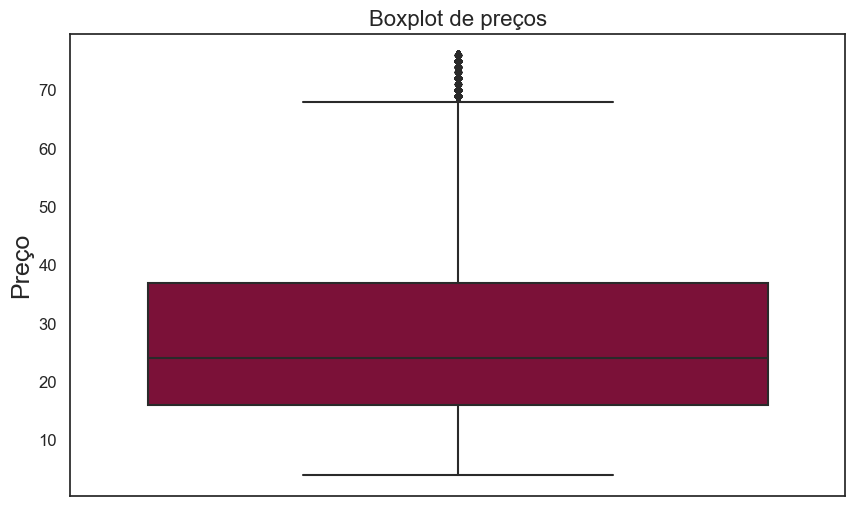

In [ ]:
#Plotagem
plt.figure(figsize= (10,6))

#Primeiro plot - histograma de pontos
sns.boxplot(data = df.drop(prices_outliers.index), y = 'price',   color = '#8c0034')
plt.title('Boxplot de preços')
plt.ylabel('Preço')

In [ ]:
prices_outliers.loc[(prices_outliers['price']>500), ['designation', 'variety','winery','title','price']].sort_values(by = 'price', ascending = False).sample(10)

designation  \
108646                                              None   
65352                                               None   
83852                                     Family Reserve   
76750   Hattenheimer Wisselbrunnen Beernauslese Gold Cap   
160367          Kiedrich Gräfenberg Trockenbeerenauslese   
245138                                              None   
56959                                      Hill of Grace   
132405                                              None   
21095                                               None   
113930                                              None   

                           variety                         winery  \
108646                      Merlot                        Masseto   
65352     Bordeaux-style Red Blend                 Château Pétrus   
83852           Cabernet Sauvignon                       Yao Ming   
76750                     Riesling               Baron Knyphausen   
160367                    Riesling                    Robert Weil   
245138                  Chardonnay           Bouchard Père & Fils   
56959                       Shiraz                       Henschke   
132405  Bordeaux-style White Blend  Château La Mission Haut-Brion   
21095     Bordeaux-style Red Blend      Château Mouton Rothschild   
113930  Bordeaux-style White Blend                Château d'Yquem   

                                                    title   price  
108646                      Masseto 2010 Merlot (Toscana)   550.0  
65352                        Château Pétrus 2011  Pomerol  2000.0  
83852   Yao Ming 2009 Family Reserve Cabernet Sauvigno...   625.0  
76750   Baron Knyphausen 2011 Hattenheimer Wisselbrunn...   510.0  
160367                                               None   670.0  
245138                                               None   600.0  
56959    Henschke 2010 Hill of Grace Shiraz (Eden Valley)   820.0  
132405                                               None   698.0  
21095            Château Mouton Rothschild 2011  Pauillac   600.0  
113930                    Château d'Yquem 2005  Sauternes   800.0

In [ ]:
# Esse vinho por exemplo é uma classificação única, mesmo sendo outro vinho, ainda o preço está muito diferente.. Me parece que os dados estão controversos e mal preenchidos
df.loc[(df['variety'] == 'Chardonnay') & (df['winery'] == 'Blair') & (df['designation'] == 'Roger Rose Vineyard'), ['designation', 'variety','winery','title','price']]

designation     variety winery  \
18643   Roger Rose Vineyard  Chardonnay  Blair   
120391  Roger Rose Vineyard  Chardonnay  Blair   
143289  Roger Rose Vineyard  Chardonnay  Blair   

                                                    title   price  
18643   Blair 2012 Roger Rose Vineyard Chardonnay (Arr...    28.0  
120391  Blair 2013 Roger Rose Vineyard Chardonnay (Arr...  2013.0  
143289                                               None  2013.0

![Alt text](image.png)

##### 3.2.3. Entendendo a relação entre 'points' e 'price'

In [ ]:
# Calcular log de price para melhor trabalhar com a feature, minimizando valores outliers 
df['log_price'] = np.log(df.price)

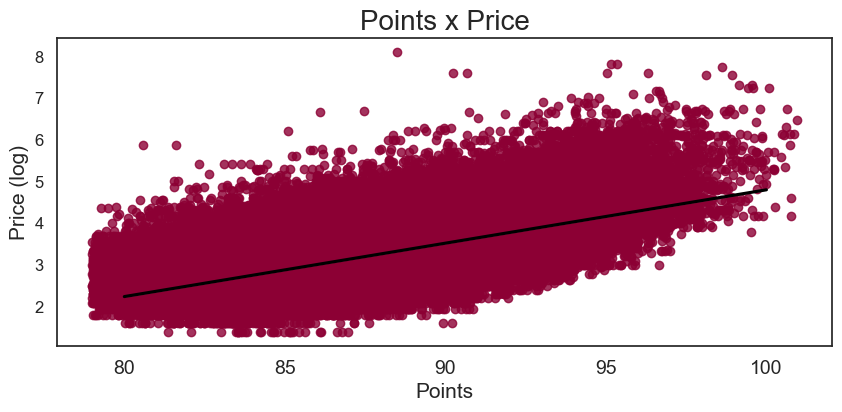

In [ ]:
plt.figure(figsize=(10,4))
sns.regplot(x='points', y='log_price', 
                data=df, line_kws={'color':'black'},
                x_jitter=True, fit_reg=True, color='#8c0034')
plt.title("Points x Price", fontsize=20)
plt.xlabel("Points", fontsize= 15)
plt.ylabel("Price (log)", fontsize= 15)

plt.show()

#### 3.3. 'country'

##### 3.3.1. Visualizando a distribuição de 'country'

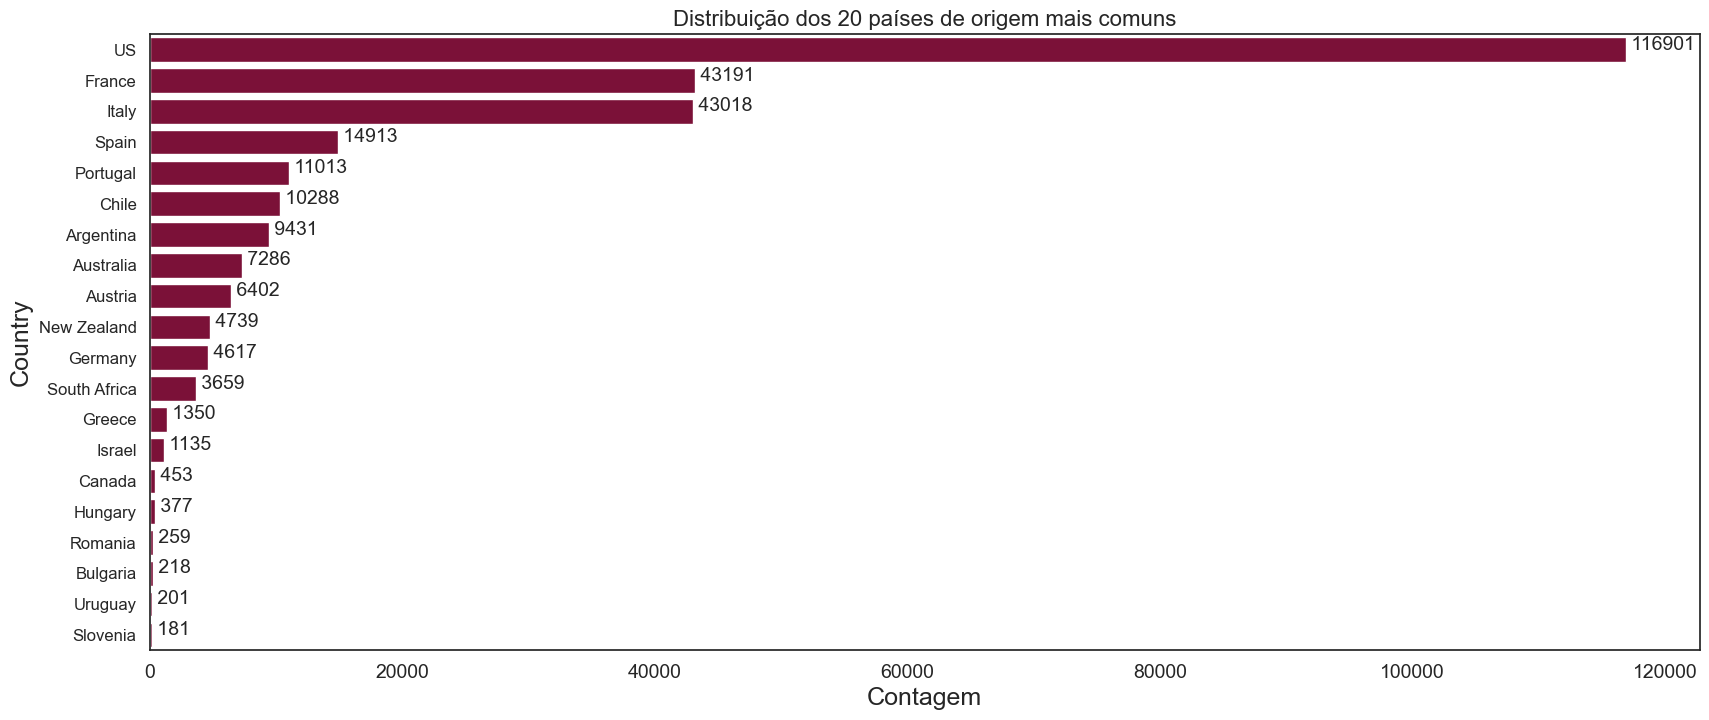

In [ ]:
count = df.groupby('country').agg(count_column=('country', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição dos 20 países de origem mais comuns')
ax = sns.barplot(data=count, x='count_column', y='country', color='#8c0034', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('Country')  # Você tinha 'Country' aqui, mas acho que você quis dizer 'Variety'
plt.show()

C:\Users\lci734\AppData\Local\Temp\ipykernel_12128\1019631683.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


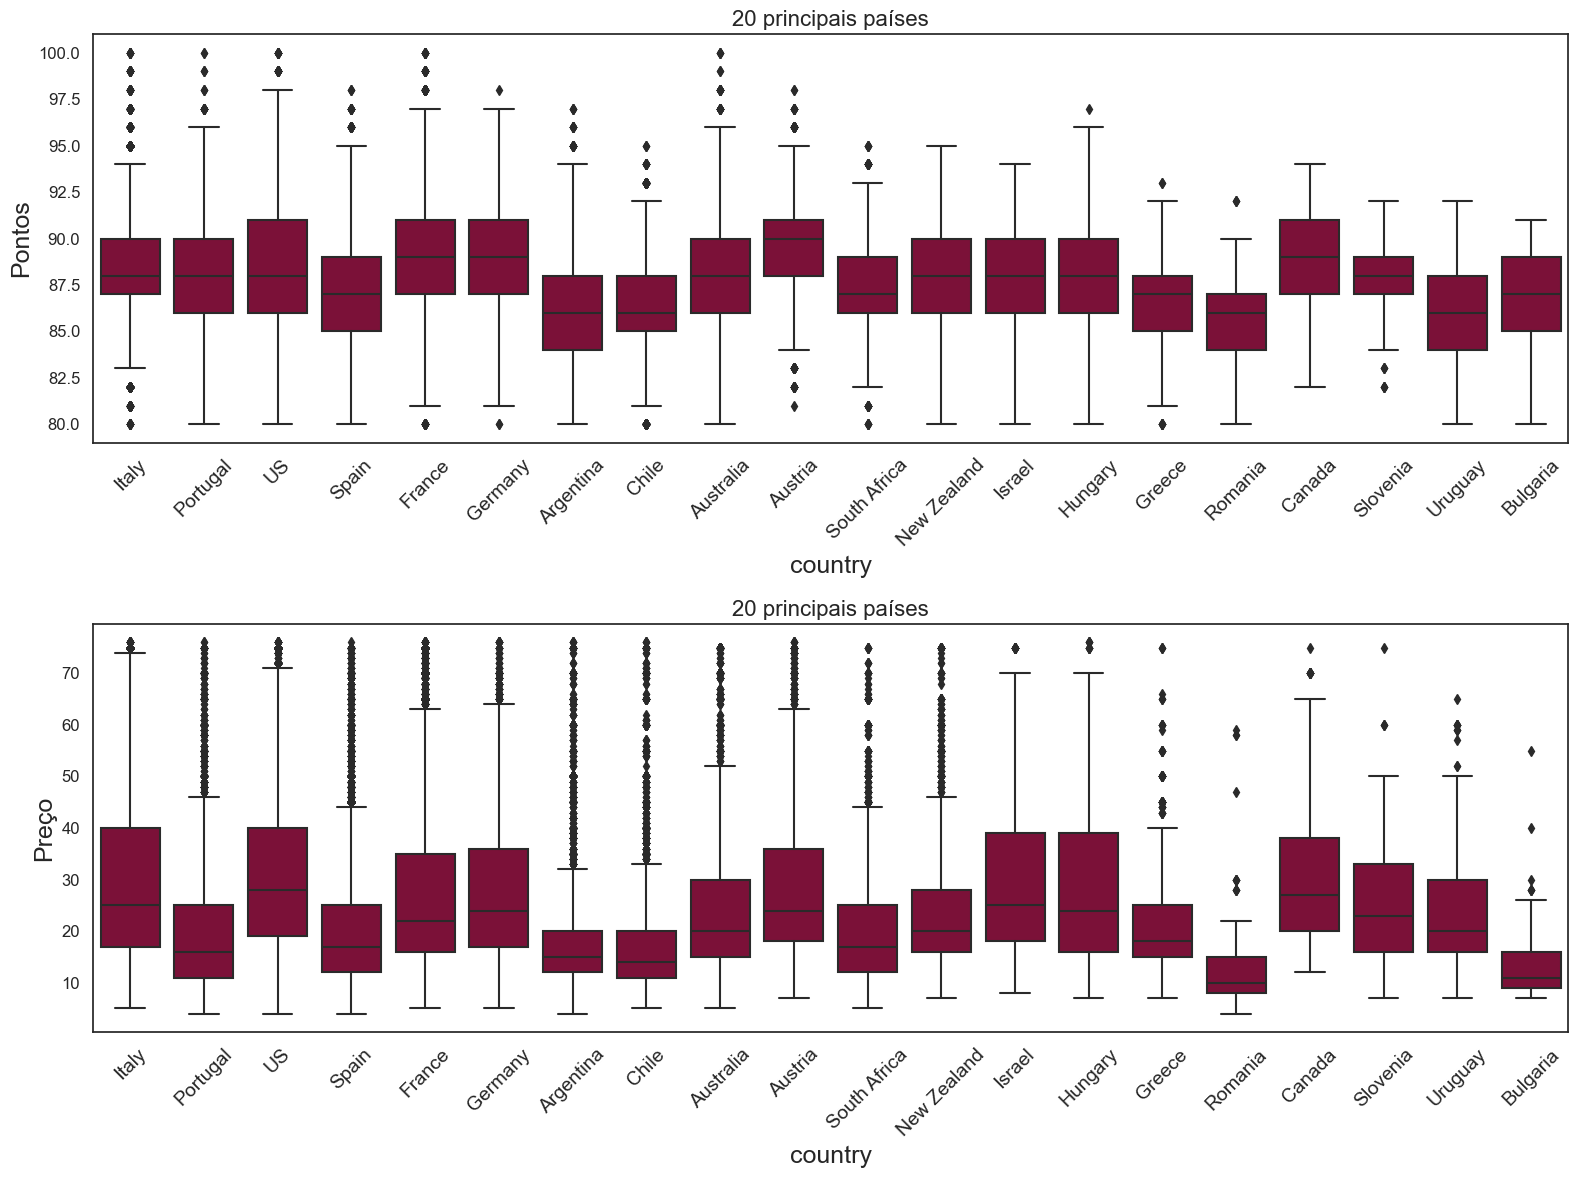

In [ ]:
#Top 20 countries
countries_list = df.country.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['country'].isin(countries_list)],x = 'country', y = 'points',   color = '#8c0034', ax = axes[0])
axes[0].set_title('20 principais países')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['country'].isin(countries_list)],x = 'country', y = 'price',   color = '#8c0034', ax = axes[1])
axes[1].set_title('20 principais países')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

In [ ]:
round((df.country.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

country
US              41.62%
France          15.38%
Italy           15.31%
Spain            5.31%
Portugal         3.92%
Chile            3.66%
Argentina        3.36%
Australia        2.59%
Austria          2.28%
New Zealand      1.69%
Germany          1.64%
South Africa      1.3%
Greece           0.48%
Israel            0.4%
Canada           0.16%
Hungary          0.13%
Romania          0.09%
Bulgaria         0.08%
Uruguay          0.07%
Slovenia         0.06%
Name: count, dtype: object

#### 3.4. 'province'

##### 3.4.1. Visualizando a distribuição de 'province'

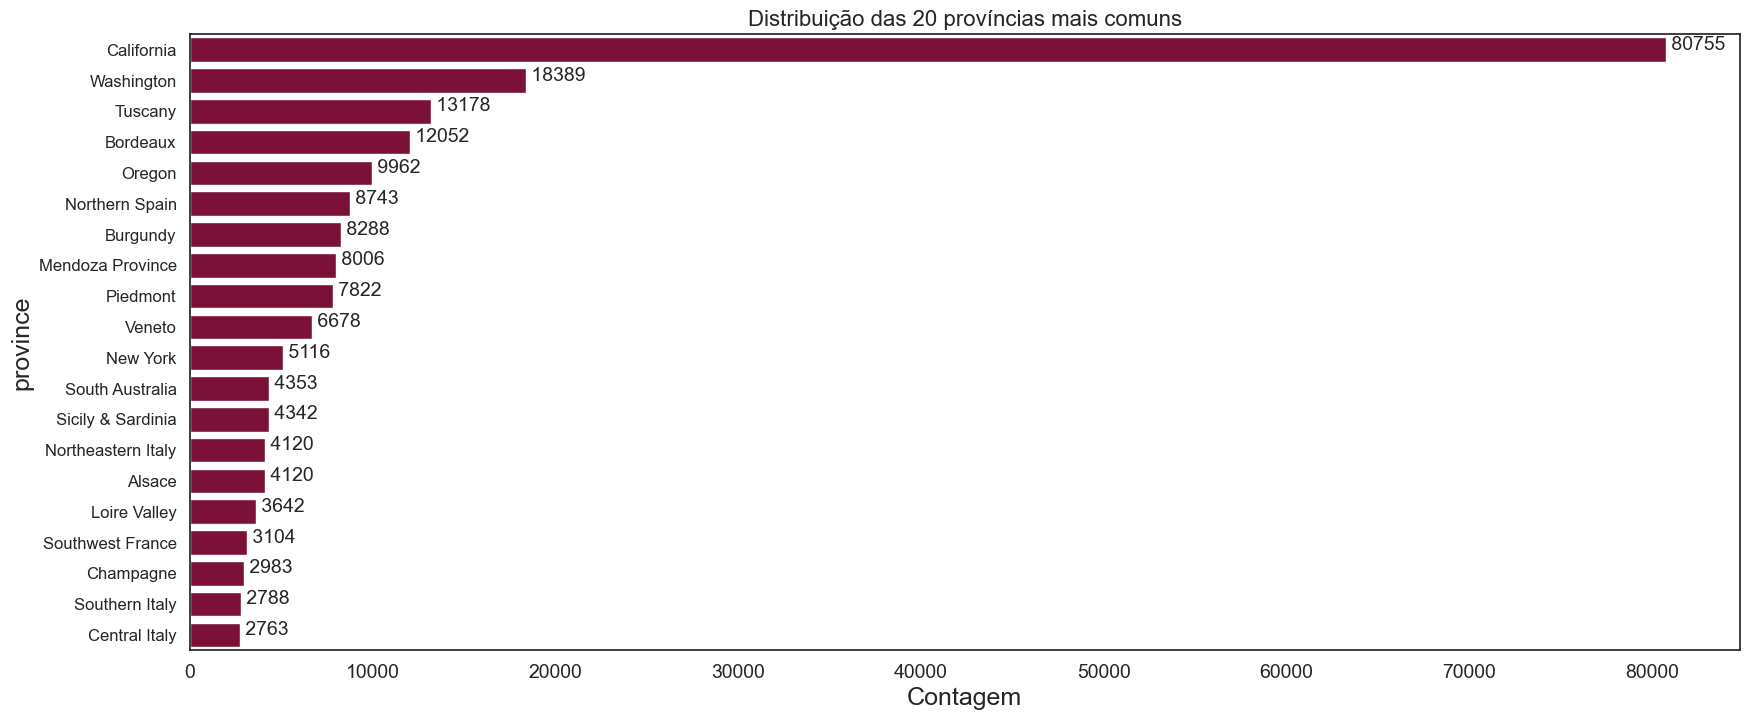

In [ ]:
count = df.groupby('province').agg(count_column=('province', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 províncias mais comuns')
ax = sns.barplot(data=count, x='count_column', y='province', color='#8c0034', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('province')
plt.show()

In [ ]:
round((df.province.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

province
California            28.75%
Washington             6.55%
Tuscany                4.69%
Bordeaux               4.29%
Oregon                 3.55%
Northern Spain         3.11%
Burgundy               2.95%
Mendoza Province       2.85%
Piedmont               2.78%
Veneto                 2.38%
New York               1.82%
South Australia        1.55%
Sicily & Sardinia      1.55%
Alsace                 1.47%
Northeastern Italy     1.47%
Loire Valley            1.3%
Southwest France       1.11%
Champagne              1.06%
Southern Italy         0.99%
Central Italy          0.98%
Name: count, dtype: object

C:\Users\lci734\AppData\Local\Temp\ipykernel_12128\2452222815.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


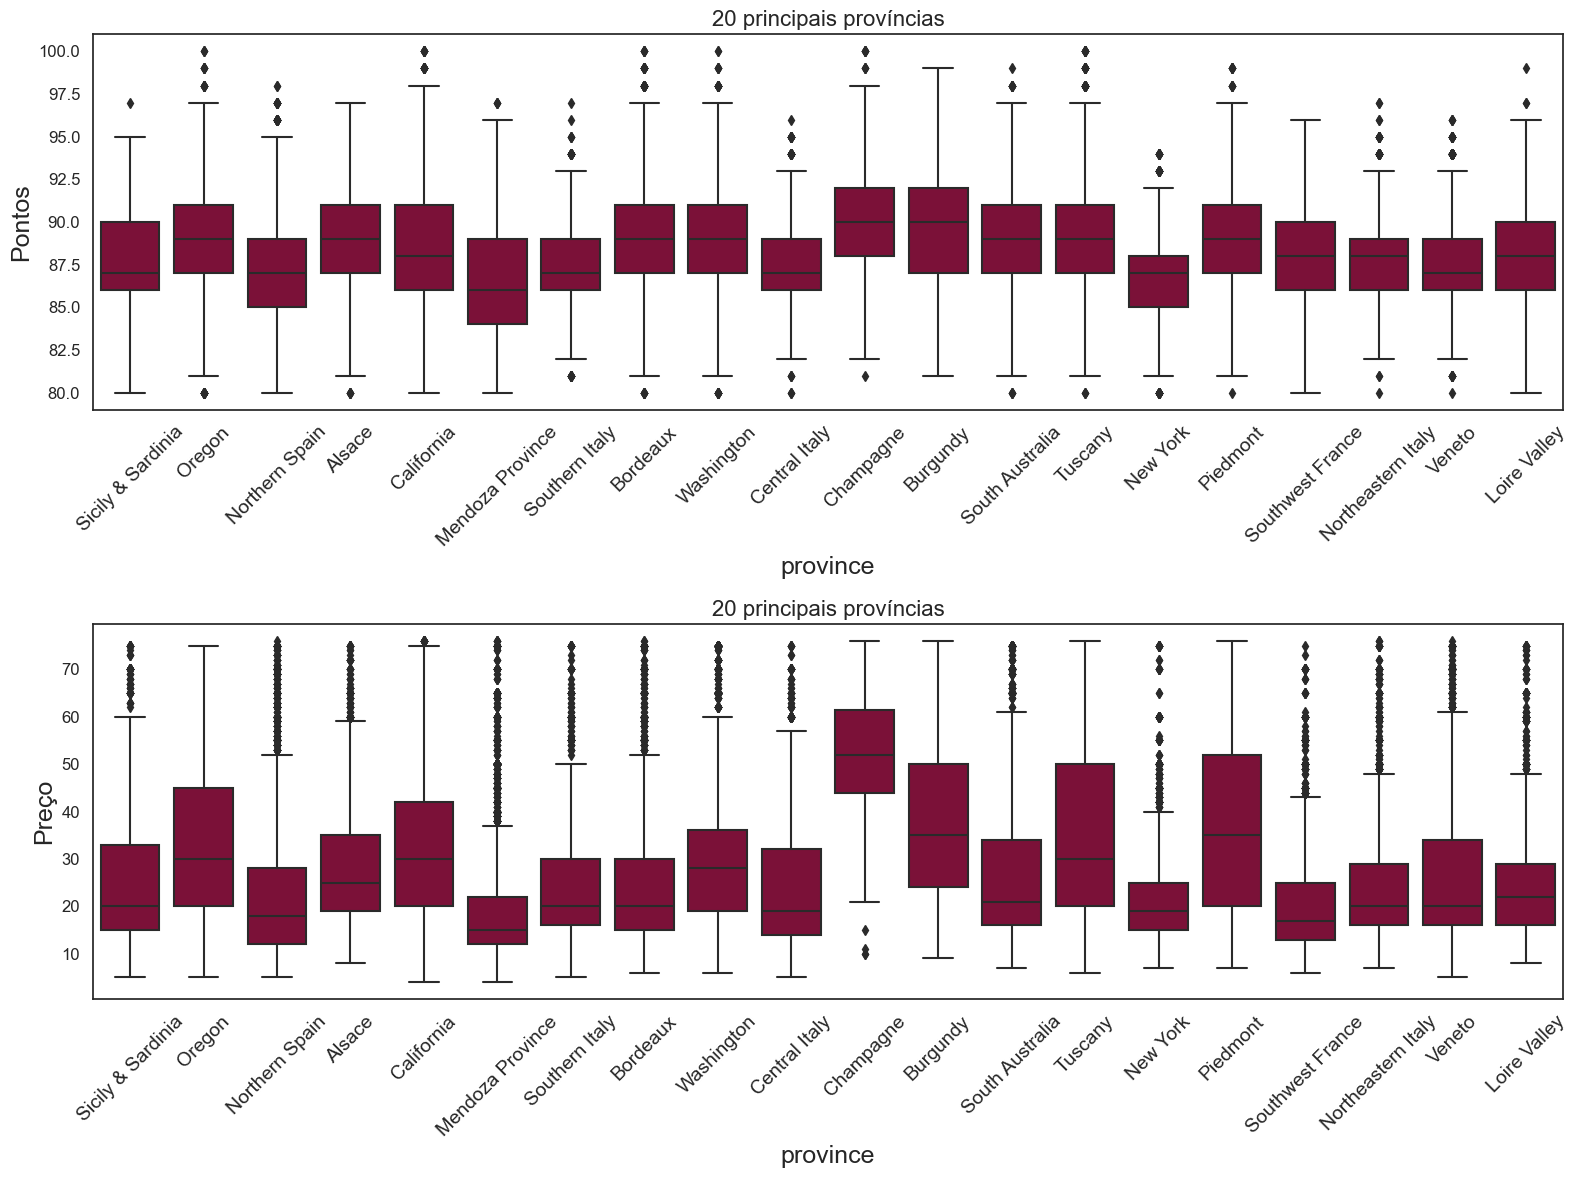

In [ ]:
#Top 20 province
countries_list = df.province.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['province'].isin(countries_list)],x = 'province', y = 'points',   color = '#8c0034', ax = axes[0])
axes[0].set_title('20 principais províncias')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['province'].isin(countries_list)],x = 'province', y = 'price',   color = '#8c0034', ax = axes[1])
axes[1].set_title('20 principais províncias')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

#### 3.5. 'variety'

##### 3.5.1. Visualizando a distribuição de 'variety'

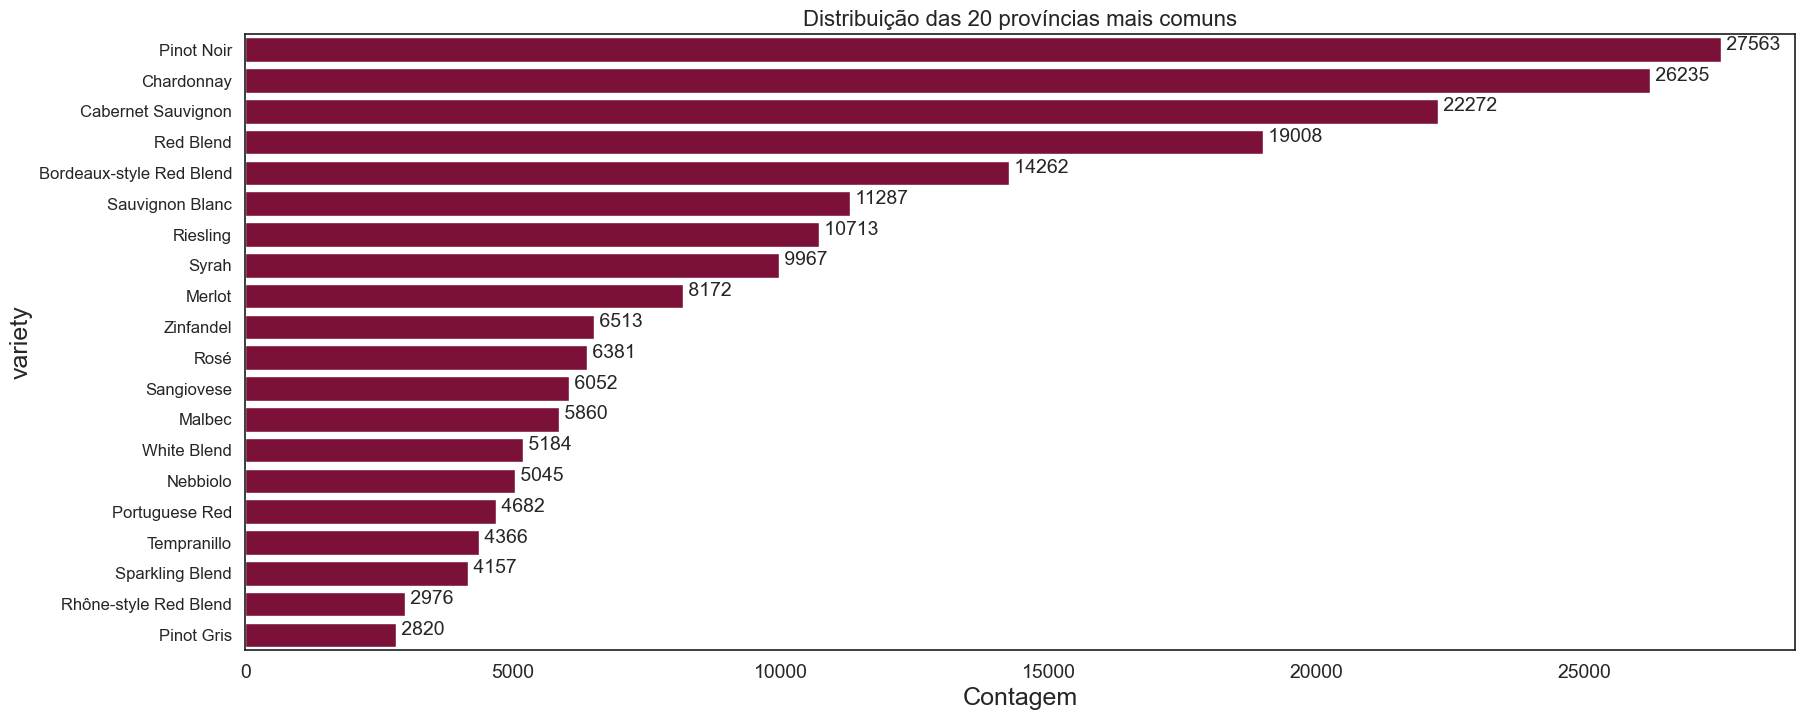

In [ ]:
count = df.groupby('variety').agg(count_column=('variety', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 províncias mais comuns')
ax = sns.barplot(data=count, x='count_column', y='variety', color='#8c0034', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('variety')
plt.show()

In [ ]:
round((df.variety.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

variety
Pinot Noir                  9.81%
Chardonnay                  9.34%
Cabernet Sauvignon          7.93%
Red Blend                   6.77%
Bordeaux-style Red Blend    5.08%
Sauvignon Blanc             4.02%
Riesling                    3.81%
Syrah                       3.55%
Merlot                      2.91%
Zinfandel                   2.32%
Rosé                        2.27%
Sangiovese                  2.15%
Malbec                      2.09%
White Blend                 1.85%
Nebbiolo                     1.8%
Portuguese Red              1.67%
Tempranillo                 1.55%
Sparkling Blend             1.48%
Rhône-style Red Blend       1.06%
Pinot Gris                   1.0%
Name: count, dtype: object

C:\Users\lci734\AppData\Local\Temp\ipykernel_12128\3901018403.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


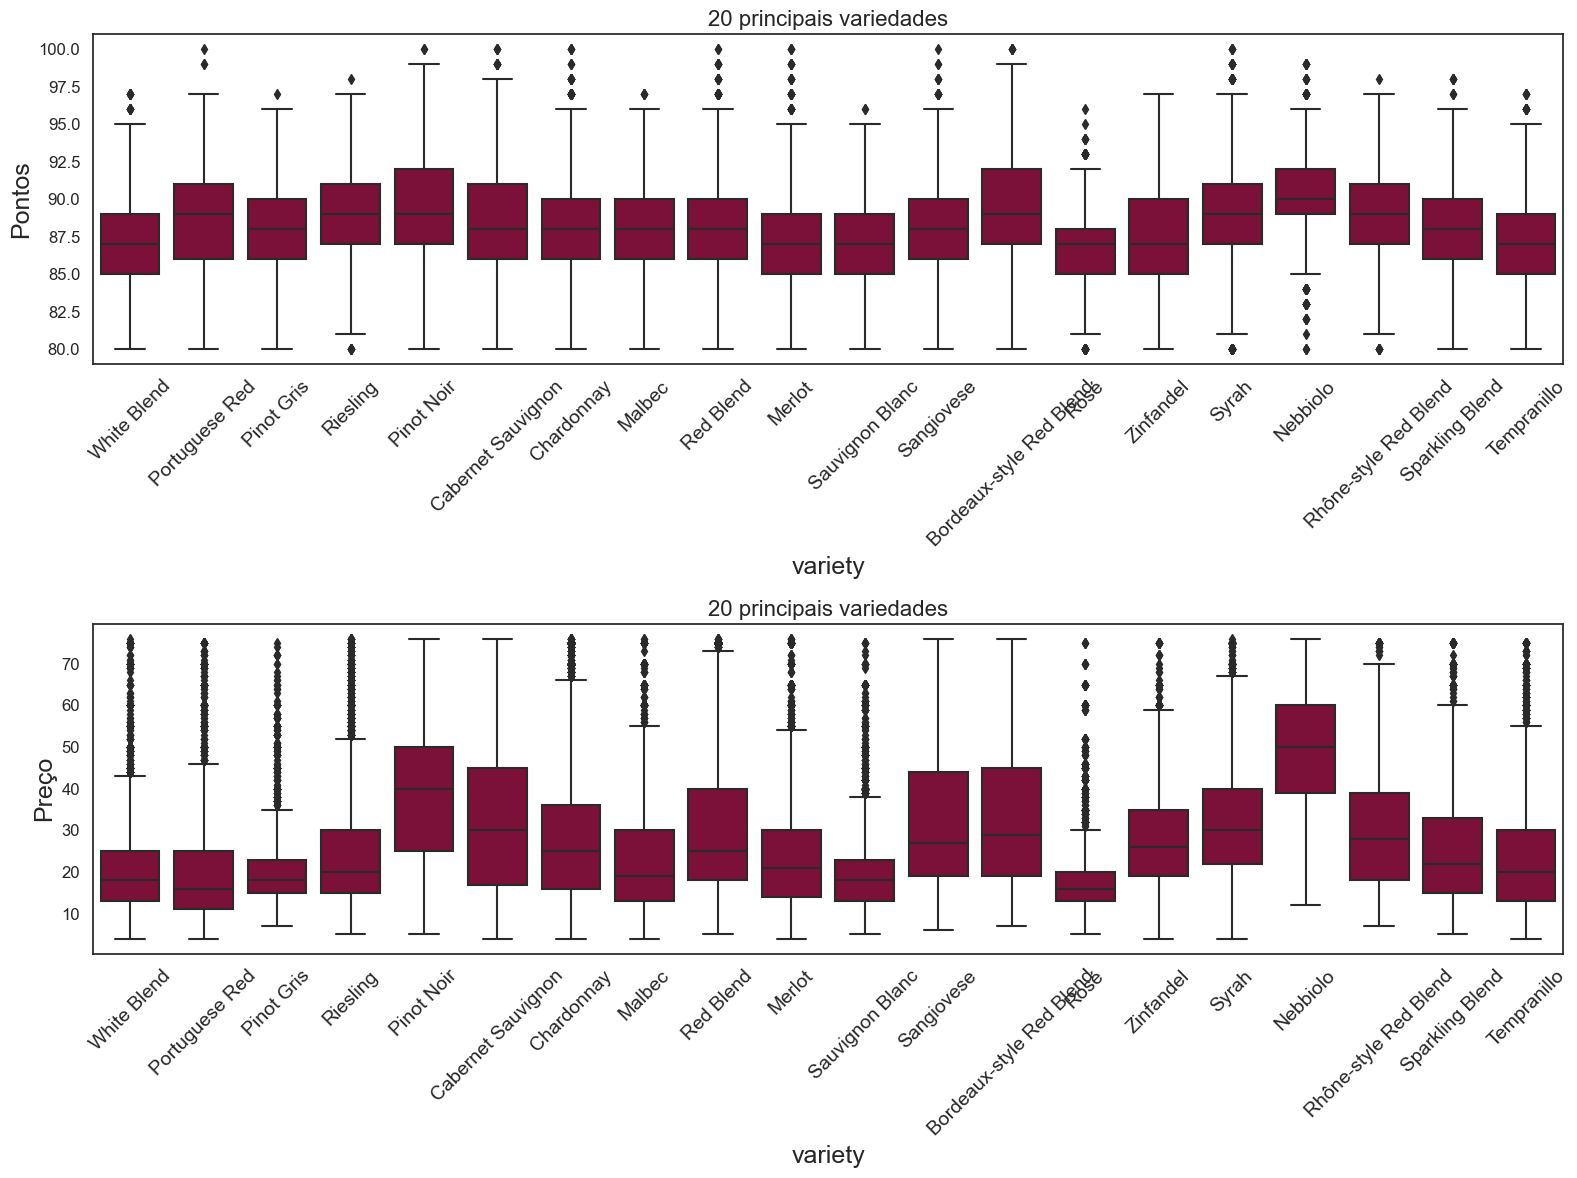

In [ ]:
#Top 20 variety
countries_list = df.variety.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['variety'].isin(countries_list)],x = 'variety', y = 'points',   color = '#8c0034', ax = axes[0])
axes[0].set_title('20 principais variedades')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['variety'].isin(countries_list)],x = 'variety', y = 'price',   color = '#8c0034', ax = axes[1])
axes[1].set_title('20 principais variedades')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

#### 3.6. 'winery'

##### 3.6.1. Visualizando a distribuição de 'winery'

In [ ]:
df_winery = df.groupby('winery')['winery'].value_counts().sort_values(ascending=False).reset_index()
df_winery['index']=df_winery.index
df_winery.describe()

count         index
count  19186.000000  19186.000000
mean      14.640936   9592.500000
std       26.927493   5538.665468
min        1.000000      0.000000
25%        2.000000   4796.250000
50%        5.000000   9592.500000
75%       15.000000  14388.750000
max      585.000000  19185.000000

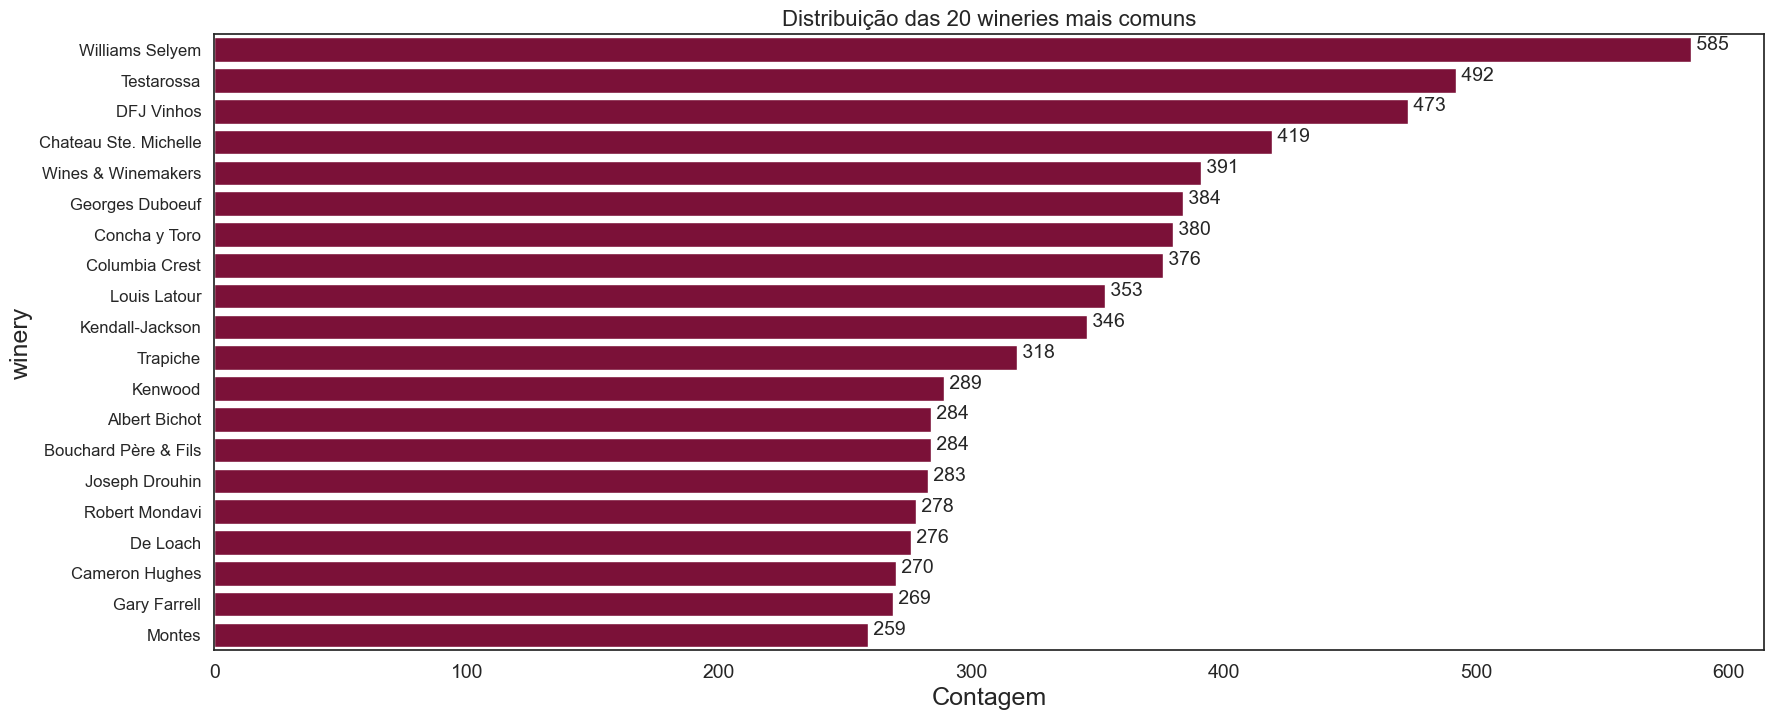

In [ ]:
count = df.groupby('winery').agg(count_column=('winery', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 wineries mais comuns')
ax = sns.barplot(data=count, x='count_column', y='winery', color='#8c0034', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('winery')
plt.show()

In [ ]:
round((df.winery.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

winery
Williams Selyem          0.21%
Testarossa               0.18%
DFJ Vinhos               0.17%
Chateau Ste. Michelle    0.15%
Wines & Winemakers       0.14%
Georges Duboeuf          0.14%
Concha y Toro            0.14%
Columbia Crest           0.13%
Louis Latour             0.13%
Kendall-Jackson          0.12%
Trapiche                 0.11%
Kenwood                   0.1%
Bouchard Père & Fils      0.1%
Albert Bichot             0.1%
Joseph Drouhin            0.1%
Robert Mondavi            0.1%
De Loach                  0.1%
Cameron Hughes            0.1%
Gary Farrell              0.1%
Montes                   0.09%
Name: count, dtype: object

C:\Users\lci734\AppData\Local\Temp\ipykernel_12128\3061151668.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


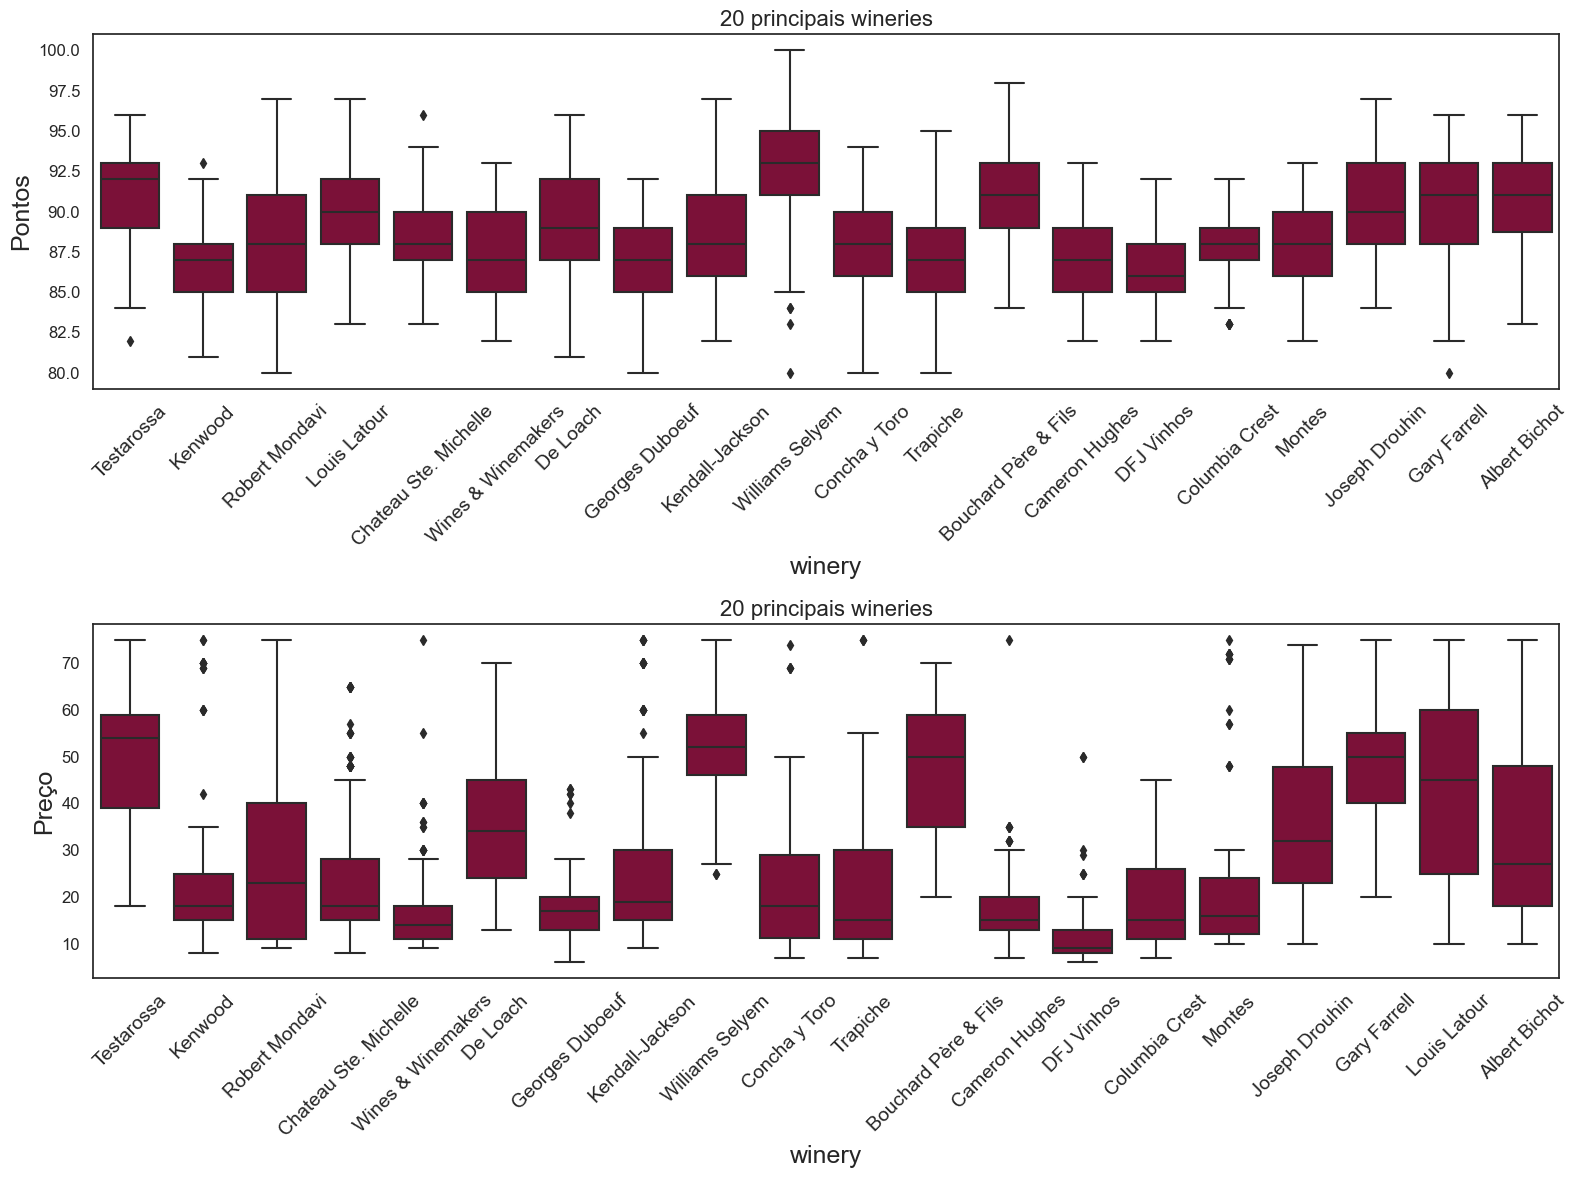

In [ ]:
#Top 20 winery
countries_list = df.winery.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['winery'].isin(countries_list)],x = 'winery', y = 'points',   color = '#8c0034', ax = axes[0])
axes[0].set_title('20 principais wineries')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['winery'].isin(countries_list)],x = 'winery', y = 'price',   color = '#8c0034', ax = axes[1])
axes[1].set_title('20 principais wineries')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

#### 3.7. 'designation'

##### 3.7.1. Visualizando a distribuição de 'designation'

In [ ]:
df_designation = df.groupby('designation')['designation'].value_counts().sort_values(ascending=False).reset_index()
df_designation['index']=df_designation.index
df_designation.describe()

count        index
count  47239.000000  47239.00000
mean       4.185122  23619.00000
std       34.124760  13636.86902
min        1.000000      0.00000
25%        1.000000  11809.50000
50%        2.000000  23619.00000
75%        4.000000  35428.50000
max     4761.000000  47238.00000

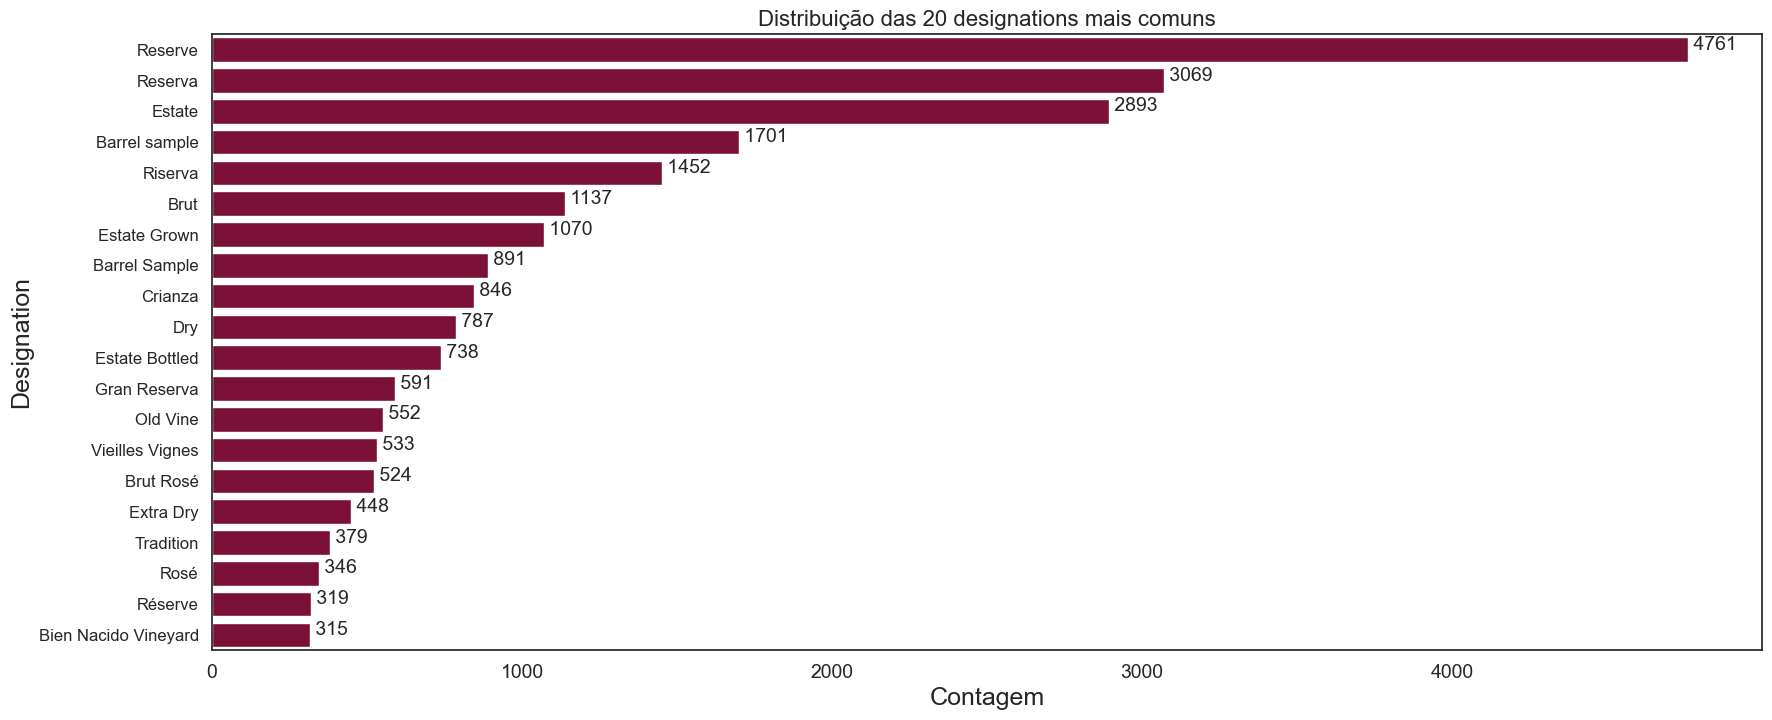

In [ ]:
count = df.groupby('designation').agg(count_column=('designation', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 designations mais comuns')
ax = sns.barplot(data=count, x='count_column', y='designation', color='#8c0034', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('Designation')
plt.show()

In [ ]:
round((df.designation.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

designation
Reserve                 1.69%
Reserva                 1.09%
Estate                  1.03%
Barrel sample           0.61%
Riserva                 0.52%
Brut                     0.4%
Estate Grown            0.38%
Barrel Sample           0.32%
Crianza                  0.3%
Dry                     0.28%
Estate Bottled          0.26%
Gran Reserva            0.21%
Old Vine                 0.2%
Vieilles Vignes         0.19%
Brut Rosé               0.19%
Extra Dry               0.16%
Tradition               0.13%
Rosé                    0.12%
Réserve                 0.11%
Bien Nacido Vineyard    0.11%
Name: count, dtype: object

C:\Users\lci734\AppData\Local\Temp\ipykernel_12128\1908006632.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


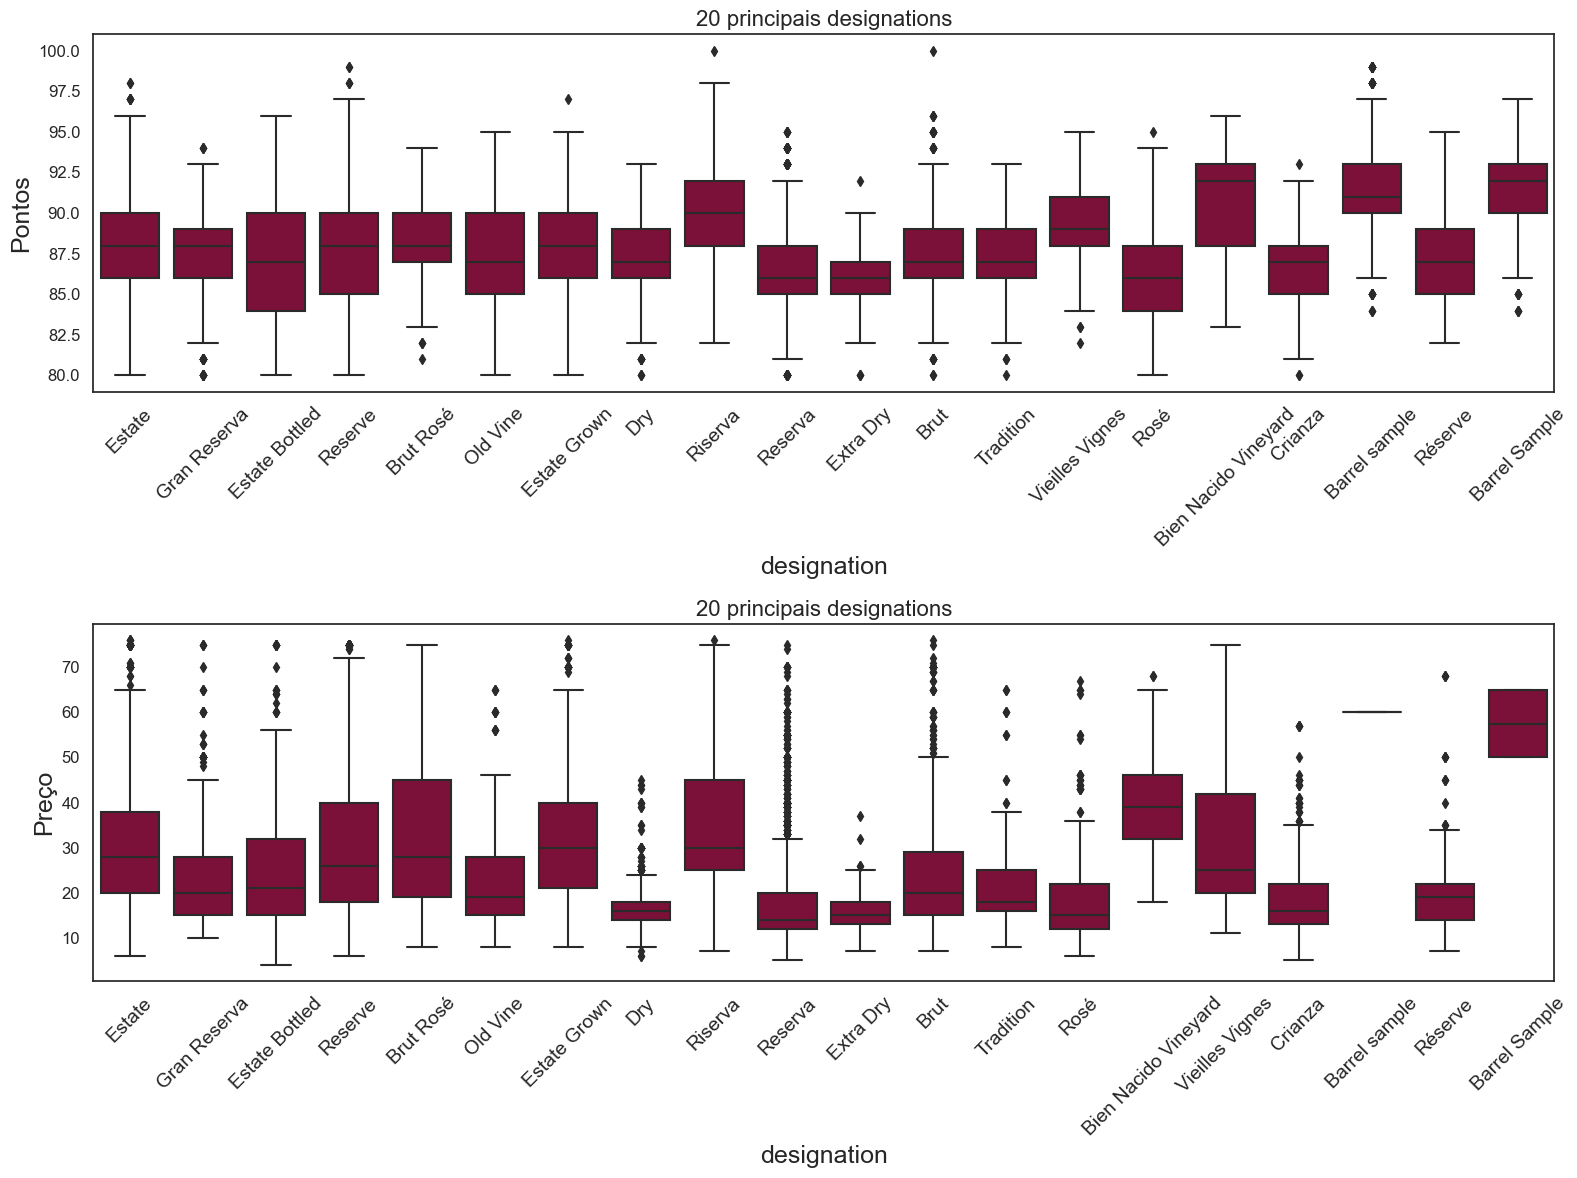

In [ ]:
#Top 20 variety
countries_list = df.designation.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['designation'].isin(countries_list)],x = 'designation', y = 'points',   color = '#8c0034', ax = axes[0])
axes[0].set_title('20 principais designations')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['designation'].isin(countries_list)],x = 'designation', y = 'price',   color = '#8c0034', ax = axes[1])
axes[1].set_title('20 principais designations')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

#### 3.8. 'tasters'

##### 3.8.1. Visualizando a distribuição de 'taster_name'

In [ ]:
df_taster_name = df.groupby('taster_name')['taster_name'].value_counts().sort_values(ascending=False).reset_index()
df_taster_name['index']=df_taster_name.index
df_taster_name.describe()

count      index
count     19.000000  19.000000
mean    5459.315789   9.000000
std     6492.162275   5.627314
min        6.000000   0.000000
25%      502.500000   4.500000
50%     4177.000000   9.000000
75%     7932.000000  13.500000
max    25514.000000  18.000000

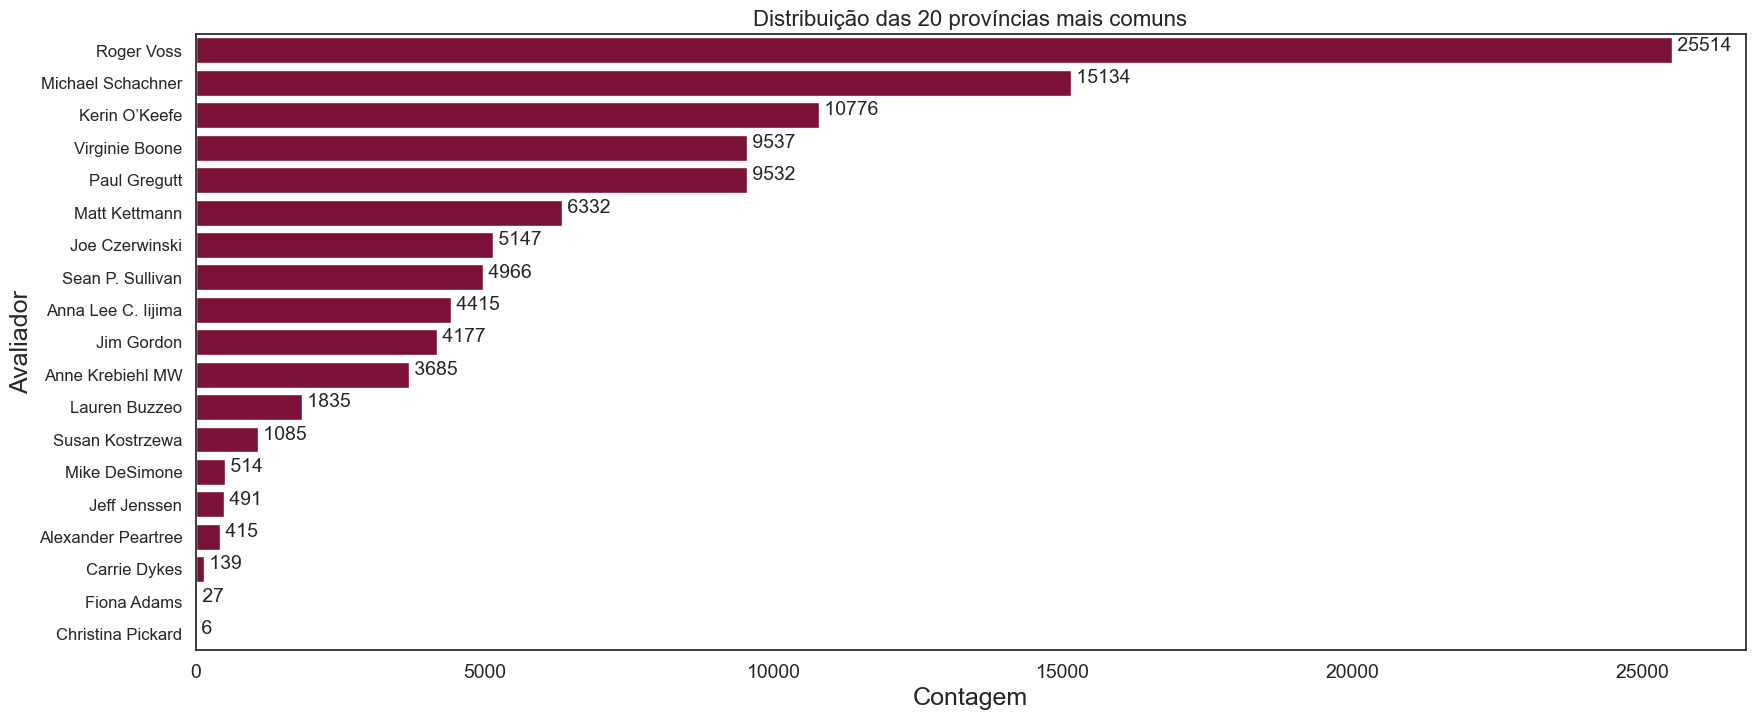

In [ ]:
count = df.groupby('taster_name').agg(count_column=('taster_name', 'count')).reset_index().sort_values(by = 'count_column', ascending= False)[:20]
plt.figure(figsize=(20,8))
plt.title('Distribuição das 20 províncias mais comuns')
ax = sns.barplot(data=count, x='count_column', y='taster_name', color='#8c0034', orient='h')
for index, value in enumerate(count['count_column']):
    ax.text(value, index, f' {value}')
plt.xlabel('Contagem')
plt.ylabel('Avaliador')
plt.show()

In [ ]:
round((df.taster_name.value_counts()[:20]/(len(df)))*100,2).astype(str)+'%'

taster_name
Roger Voss            9.08%
Michael Schachner     5.39%
Kerin O’Keefe         3.84%
Virginie Boone         3.4%
Paul Gregutt          3.39%
Matt Kettmann         2.25%
Joe Czerwinski        1.83%
Sean P. Sullivan      1.77%
Anna Lee C. Iijima    1.57%
Jim Gordon            1.49%
Anne Krebiehl MW      1.31%
Lauren Buzzeo         0.65%
Susan Kostrzewa       0.39%
Mike DeSimone         0.18%
Jeff Jenssen          0.17%
Alexander Peartree    0.15%
Carrie Dykes          0.05%
Fiona Adams           0.01%
Christina Pickard      0.0%
Name: count, dtype: object

C:\Users\lci734\AppData\Local\Temp\ipykernel_12128\2289016854.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


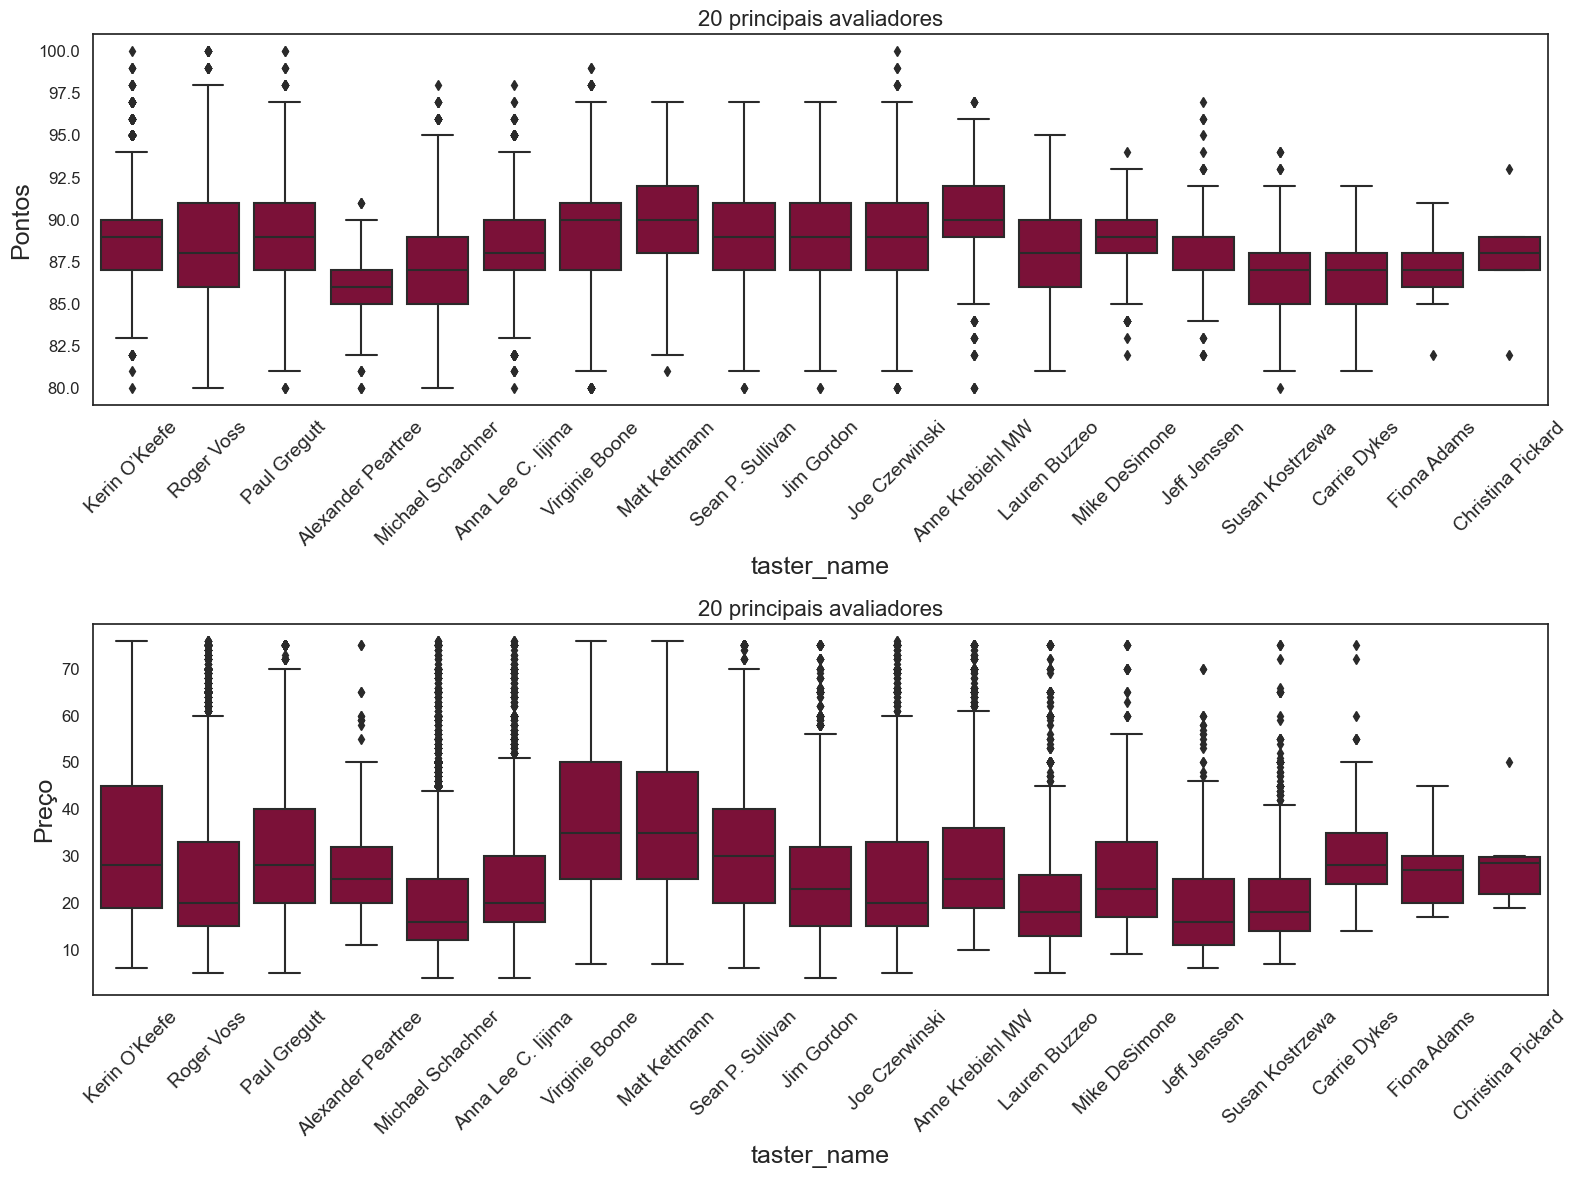

In [ ]:
#Top 20 tasters
countries_list = df.taster_name.value_counts()[:20].index.values
#Plotagem
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize= (16,12))
#Primeiro plot - histograma de pontos
axes[0] = sns.boxplot(data = df.loc[df['taster_name'].isin(countries_list)],x = 'taster_name', y = 'points',   color = '#8c0034', ax = axes[0])
axes[0].set_title('20 principais avaliadores')
axes[0].set_ylabel('Pontos')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
plt.tight_layout()
#Segundo plot - histograma de preço
axes[1] = sns.boxplot(data = df.drop(prices_outliers.index).loc[df['taster_name'].isin(countries_list)],x = 'taster_name', y = 'price',   color = '#8c0034', ax = axes[1])
axes[1].set_title('20 principais avaliadores')
axes[1].set_ylabel('Preço')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=45)
plt.subplots_adjust(hspace = 0.6,top = 0.9)
plt.tight_layout()

#### 3.9. 'description'

##### 3.9.1. Entendendo relação entre o tamanho de 'description' e 'points'

In [ ]:
df['description_length'] =  df['description'].str.len()

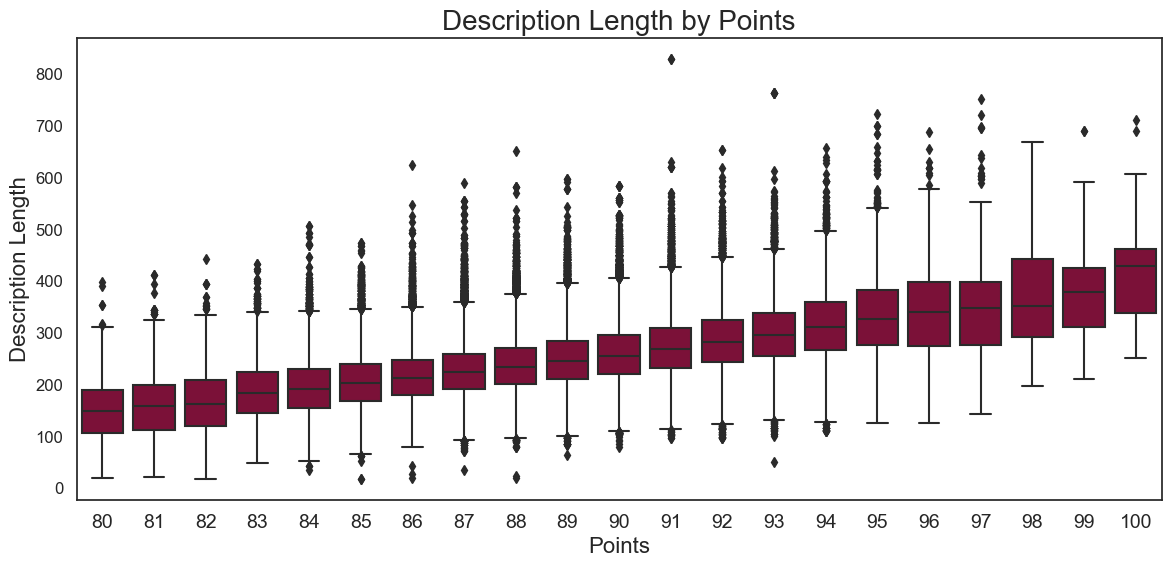

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='points', y='description_length', data=df,
                color='#8c0034')
plt.title('Description Length by Points', fontsize=20)
plt.ylabel('Description Length', fontsize = 16) # Y label
plt.xlabel('Points', fontsize = 16) # X label
plt.show()

In [ ]:
df['number_of_words'] = df['description'].str.split().str.len()


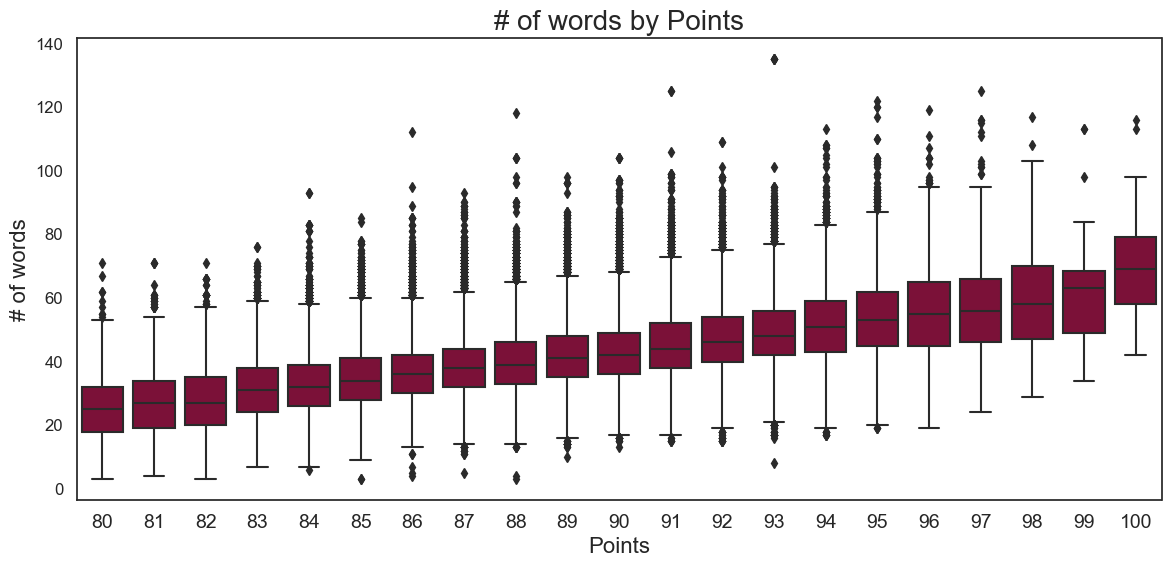

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='points', y='number_of_words', data=df,
                color='#8c0034')
plt.title('# of words by Points', fontsize=20)
plt.ylabel('# of words', fontsize = 16) # Y label
plt.xlabel('Points', fontsize = 16) # X label
plt.show()

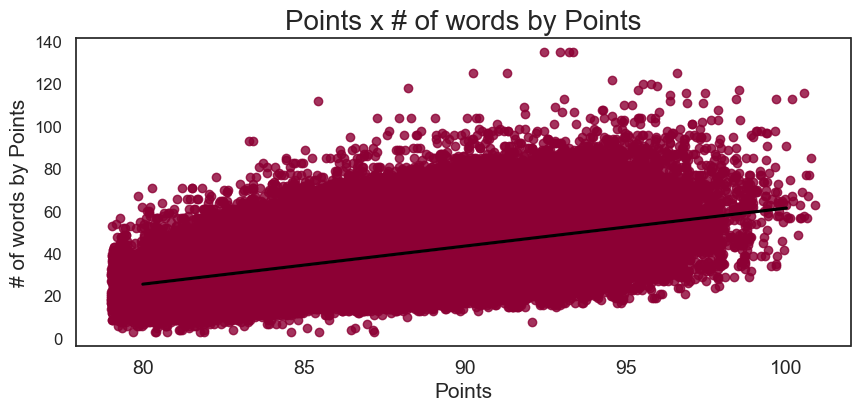

In [ ]:
plt.figure(figsize=(10,4))
sns.regplot(x='points', y='number_of_words', 
                data=df, line_kws={'color':'black'},
                x_jitter=True, fit_reg=True, color='#8c0034')
plt.title("Points x # of words by Points", fontsize=20)
plt.xlabel("Points", fontsize= 15)
plt.ylabel("# of words by Points", fontsize= 15)

plt.show()

Quanto mais extensa a descrição do texto, melhor é a nota associada ao vinho.

##### 3.9.2. Entendendo a frequência das palavras por meio da criaçãom de um bag of words e TFIDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['description'] = df['description'].str.lower()
variety = df.variety.value_counts(ascending= False)[:10].index

In [ ]:
### TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, 
                                stop_words='english',
                                max_df=.5) 

In [ ]:
X2 = vectorizer.fit_transform(df.loc[(df.variety == 'Pinot Noir')]['description']) 

In [ ]:
features = (vectorizer.get_feature_names_out()) 
scores = (X2.toarray()) 

# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 

for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 

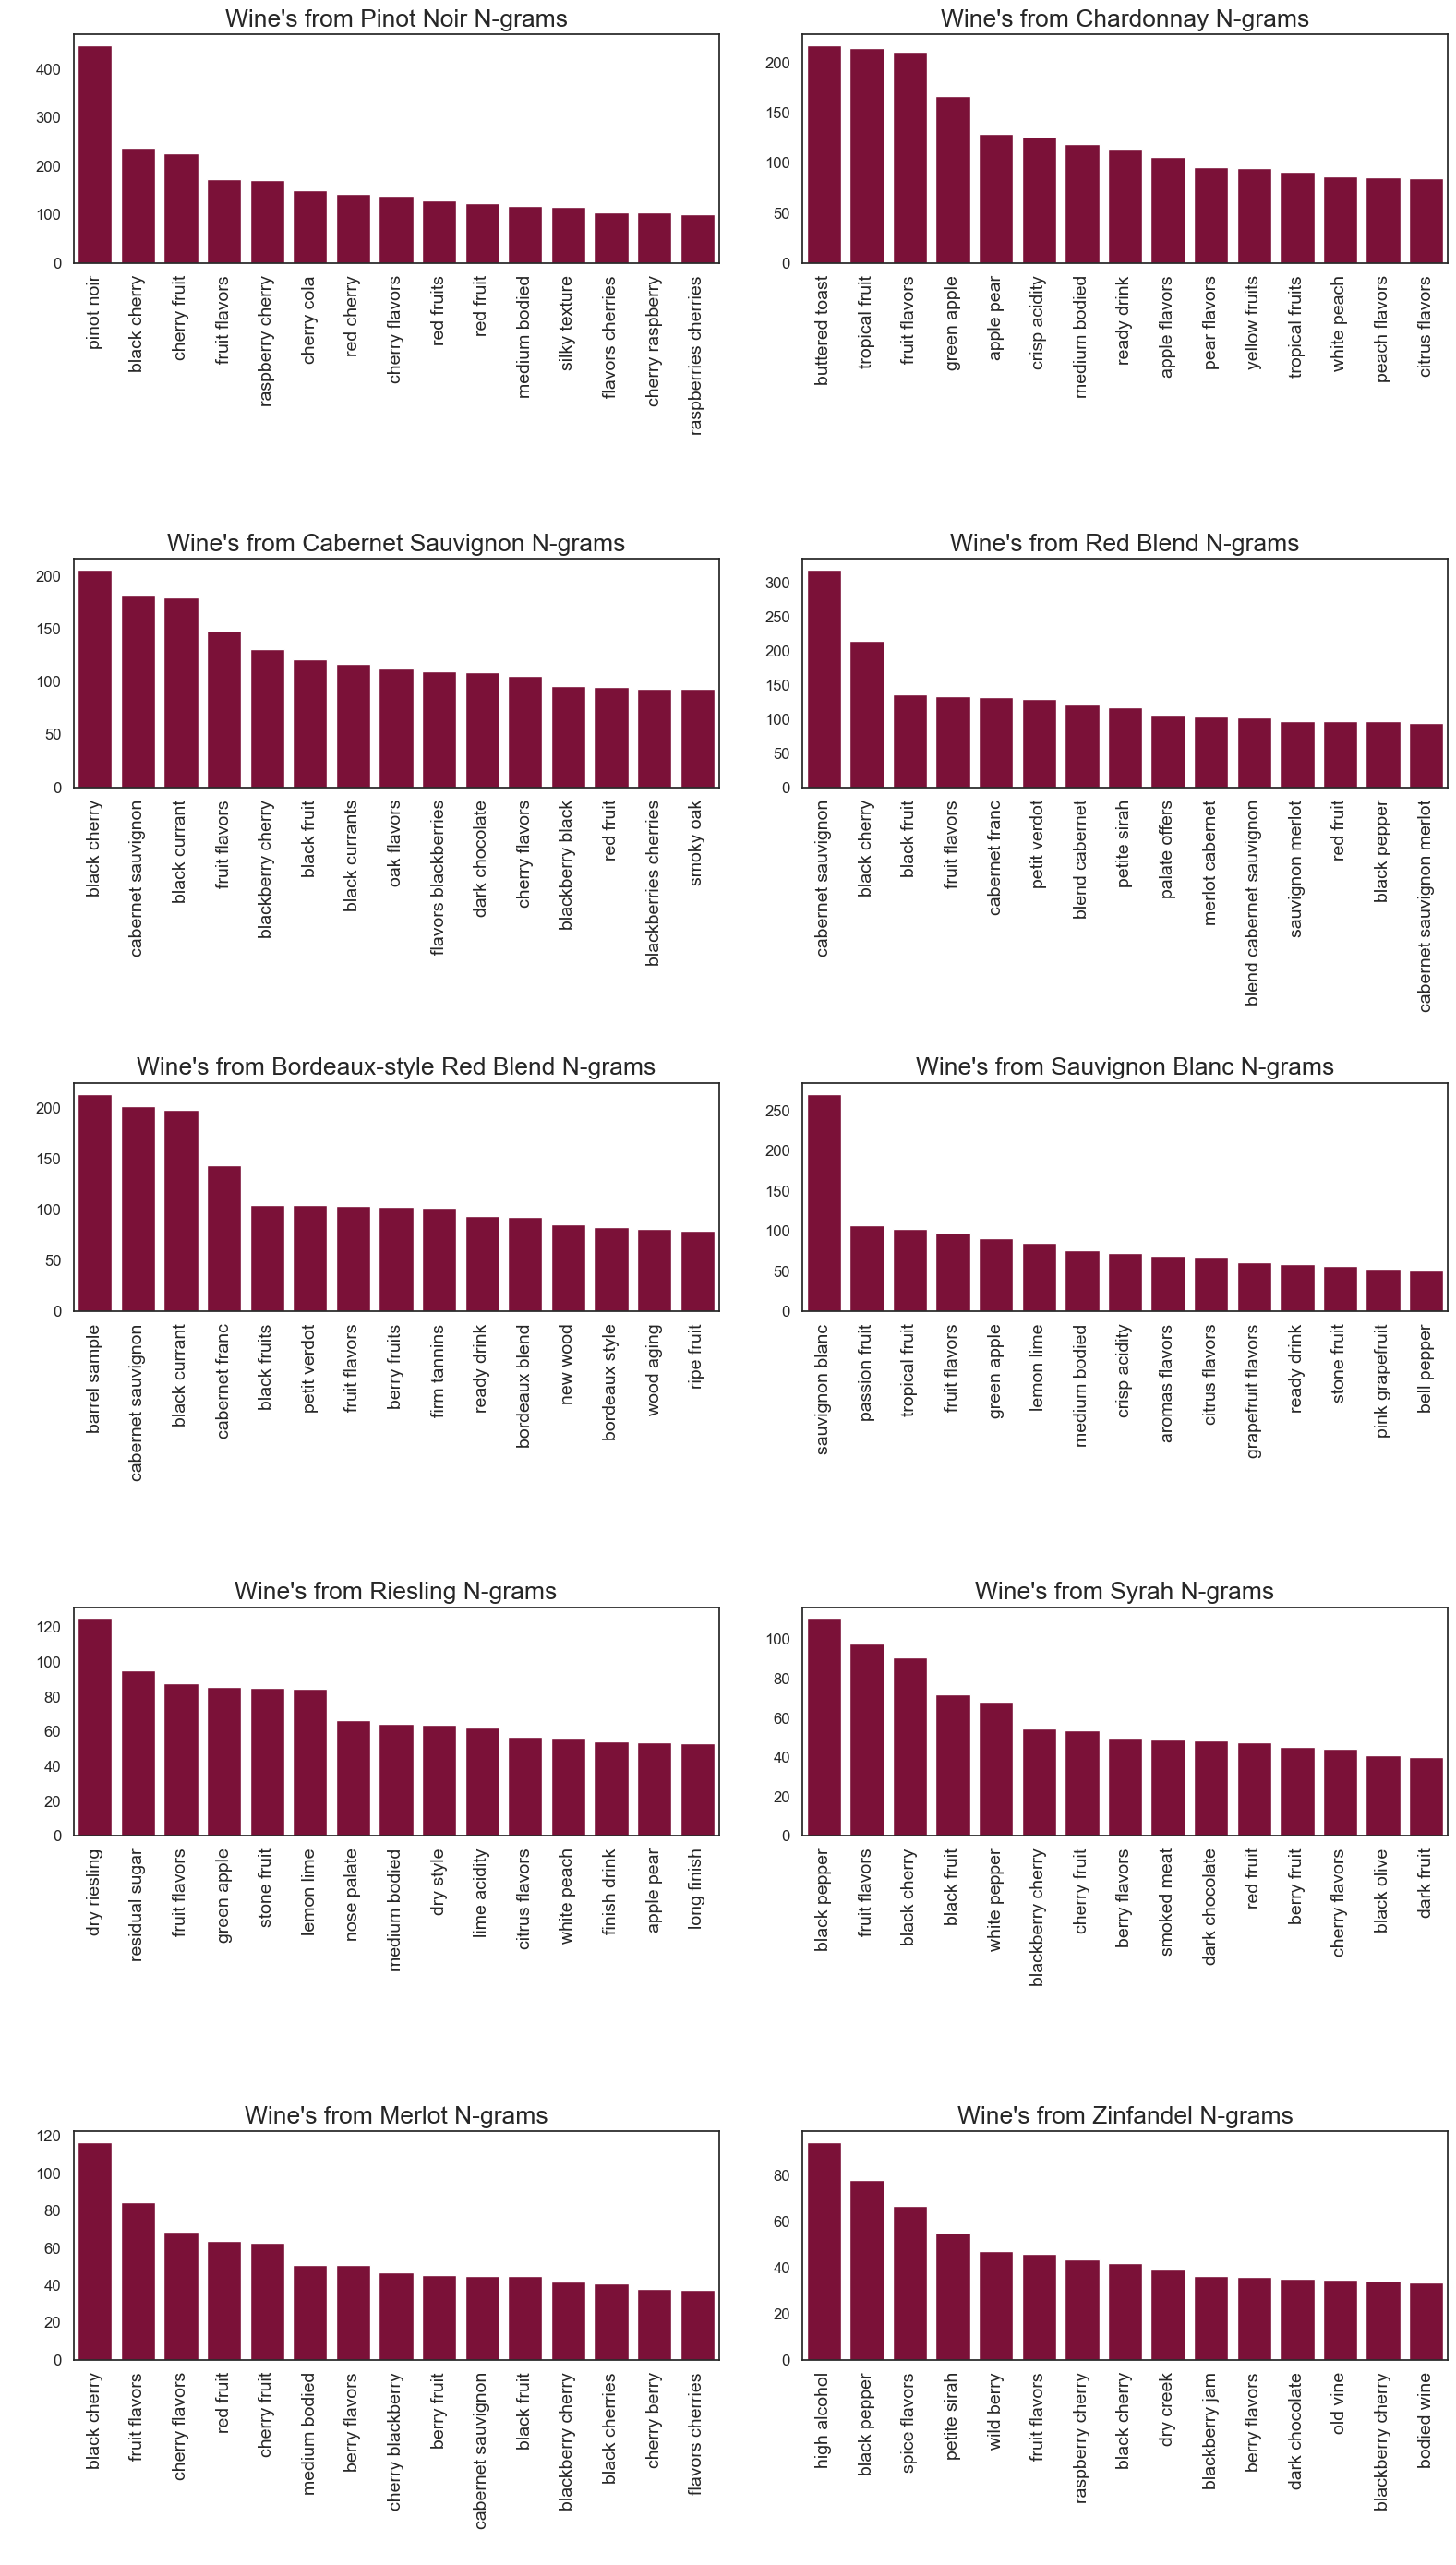

In [ ]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(5, 2)
plt.figure(figsize=(16,7*4))
for n, cat in enumerate(variety):
    ax = plt.subplot(grid[n])
    vectorizer = TfidfVectorizer(ngram_range = (2, 3), min_df=5, 
                                stop_words='english',
                                max_df=.5) 
    X2 = vectorizer.fit_transform(df.loc[(df.variety == cat)]['description']) 
    features = (vectorizer.get_feature_names_out()) 
    scores = (X2.toarray())
    
    # Getting top ranking features 
    sums = X2.sum(axis = 0) 
    data1 = []
    
    for col, term in enumerate(features): 
        data1.append( (term, sums[0,col] ))
    ranking = pd.DataFrame(data1, columns = ['term','rank']) 
    words = (ranking.sort_values('rank', ascending = False))[:15]
    
    sns.barplot(x='term', y='rank', data=words, ax=ax, 
                color='#8c0034', orient='v')
    ax.set_title(f"Wine's from {cat} N-grams", fontsize=19)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel(' ')
    ax.set_xlabel(" ")

plt.subplots_adjust(top = 0.95, hspace=.9, wspace=.1)
plt.tight_layout()
plt.show()

In [ ]:
df['description'] = df['description'].str.lower()
X = df['description']
vectorizer = TfidfVectorizer(ngram_range= (2,3), min_df= 5, stop_words= 'english', max_df = 0.5)
X_tfidf = vectorizer.fit_transform(X)
top_40_indices = X_tfidf.sum(axis=0).argsort()[0, -40:].tolist()
feature_names = vectorizer.get_feature_names_out()
top_40_words = [feature_names[i] for i in top_40_indices]

In [ ]:
top_40_words[0]

array(['drink 2018', 'black plum', 'red fruits', 'wine offers',
       'fruity wine', 'black fruits', 'cabernet franc', 'white pepper',
       'berry fruits', 'fruit aromas', 'red cherry', 'flavors finish',
       'nose palate', 'berry fruit', 'firm tannins', 'aromas flavors',
       'stone fruit', 'spice flavors', 'tropical fruit', 'finish drink',
       'wine shows', 'black pepper', 'ripe fruit', 'crisp acidity',
       'green apple', 'sauvignon blanc', 'palate offers',
       'cherry flavors', 'berry flavors', 'red berry', 'cherry fruit',
       'black currant', 'red fruit', 'medium bodied', 'black fruit',
       'pinot noir', 'ready drink', 'cabernet sauvignon', 'black cherry',
       'fruit flavors'], dtype=object)

In [ ]:
X_tfidf_top_40 = pd.DataFrame(X_tfidf[:, top_40_indices[0]].toarray(), columns=top_40_words[0])

In [ ]:
X_tfidf_top_40

drink 2018  black plum  red fruits  wine offers  fruity wine  \
0              0.0         0.0         0.0          0.0     0.000000   
1              0.0         0.0         0.0          0.0     0.128963   
2              0.0         0.0         0.0          0.0     0.000000   
3              0.0         0.0         0.0          0.0     0.000000   
4              0.0         0.0         0.0          0.0     0.000000   
...            ...         ...         ...          ...          ...   
280896         0.0         0.0         0.0          0.0     0.000000   
280897         0.0         0.0         0.0          0.0     0.000000   
280898         0.0         0.0         0.0          0.0     0.000000   
280899         0.0         0.0         0.0          0.0     0.000000   
280900         0.0         0.0         0.0          0.0     0.000000   

        black fruits  cabernet franc  white pepper  berry fruits  \
0                0.0             0.0           0.0      0.000000   
1                0.0             0.0           0.0      0.125655   
2                0.0             0.0           0.0      0.000000   
3                0.0             0.0           0.0      0.000000   
4                0.0             0.0           0.0      0.000000   
...              ...             ...           ...           ...   
280896           0.0             0.0           0.0      0.000000   
280897           0.0             0.0           0.0      0.000000   
280898           0.0             0.0           0.0      0.000000   
280899           0.0             0.0           0.0      0.000000   
280900           0.0             0.0           0.0      0.000000   

        fruit aromas  ...  cherry fruit  black currant  red fruit  \
0                0.0  ...           0.0            0.0        0.0   
1                0.0  ...           0.0            0.0        0.0   
2                0.0  ...           0.0            0.0        0.0   
3                0.0  ...           0.0            0.0        0.0   
4                0.0  ...           0.0            0.0        0.0   
...              ...  ...           ...            ...        ...   
280896           0.0  ...           0.0            0.0        0.0   
280897           0.0  ...           0.0            0.0        0.0   
280898           0.0  ...           0.0            0.0        0.0   
280899           0.0  ...           0.0            0.0        0.0   
280900           0.0  ...           0.0            0.0        0.0   

        medium bodied  black fruit  pinot noir  ready drink  \
0                 0.0          0.0         0.0          0.0   
1                 0.0          0.0         0.0          0.0   
2                 0.0          0.0         0.0          0.0   
3                 0.0          0.0         0.0          0.0   
4                 0.0          0.0         0.0          0.0   
...               ...          ...         ...          ...   
280896            0.0          0.0         0.0          0.0   
280897            0.0          0.0         0.0          0.0   
280898            0.0          0.0         0.0          0.0   
280899            0.0          0.0         0.0          0.0   
280900            0.0          0.0         0.0          0.0   

        cabernet sauvignon  black cherry  fruit flavors  
0                      0.0           0.0            0.0  
1                      0.0           0.0            0.0  
2                      0.0           0.0            0.0  
3                      0.0           0.0            0.0  
4                      0.0           0.0            0.0  
...                    ...           ...            ...  
280896                 0.0           0.0            0.0  
280897                 0.0           0.0            0.0  
280898                 0.0           0.0            0.0  
280899                 0.0           0.0            0.0  
280900                 0.0           0.0            0.0  

[280901 rows x 40 columns]

In [ ]:
X_tfidf_top_40['is_0'] = X_tfidf_top_40.apply(lambda x: x.sum(), axis = 1)

In [ ]:
X_tfidf_top_40.columns

Index(['drink 2018', 'black plum', 'red fruits', 'wine offers', 'fruity wine',
       'black fruits', 'cabernet franc', 'white pepper', 'berry fruits',
       'fruit aromas', 'red cherry', 'flavors finish', 'nose palate',
       'berry fruit', 'firm tannins', 'aromas flavors', 'stone fruit',
       'spice flavors', 'tropical fruit', 'finish drink', 'wine shows',
       'black pepper', 'ripe fruit', 'crisp acidity', 'green apple',
       'sauvignon blanc', 'palate offers', 'cherry flavors', 'berry flavors',
       'red berry', 'cherry fruit', 'black currant', 'red fruit',
       'medium bodied', 'black fruit', 'pinot noir', 'ready drink',
       'cabernet sauvignon', 'black cherry', 'fruit flavors', 'is_0'],
      dtype='object')

In [ ]:
percentual = str(round((len(X_tfidf_top_40[X_tfidf_top_40["is_0"]== 0])/len(X_tfidf_top_40) )*100,2))+'%'
print(f'Numero de linhas: {len(X_tfidf_top_40)}')
print(f'Linhas iguais a zero: {len(X_tfidf_top_40[X_tfidf_top_40["is_0"]== 0])}')
print(f'numero de linhas iguais a 0 representa: {percentual}')

Numero de linhas: 280901
Linhas iguais a zero: 135545
numero de linhas iguais a 0 representa: 48.25%


### 4. Testing sentiment analysis

In [21]:
import pandas as pd
import numpy as np
import os
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   country                280833 non-null  object  
 1   description            280901 non-null  object  
 2   designation            197701 non-null  object  
 3   points                 280901 non-null  int64   
 4   price                  258210 non-null  float64 
 5   province               280833 non-null  object  
 6   region_1               234594 non-null  object  
 7   region_2               111464 non-null  object  
 8   taster_name            103727 non-null  object  
 9   taster_twitter_handle  98758 non-null   object  
 10  title                  129971 non-null  object  
 11  variety                280900 non-null  object  
 12  winery                 280901 non-null  object  
 13  points_cluster         280901 non-null  category
 14  log_price           

#### 4.1 Análise com TextBlob

In [ ]:
df['polarity_blob'] = df.description.apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity_blob'] = df.description.apply(lambda x: TextBlob(x).sentiment.subjectivity)

##### 4.1.1. Visualizando a distribuição de 'polarity'

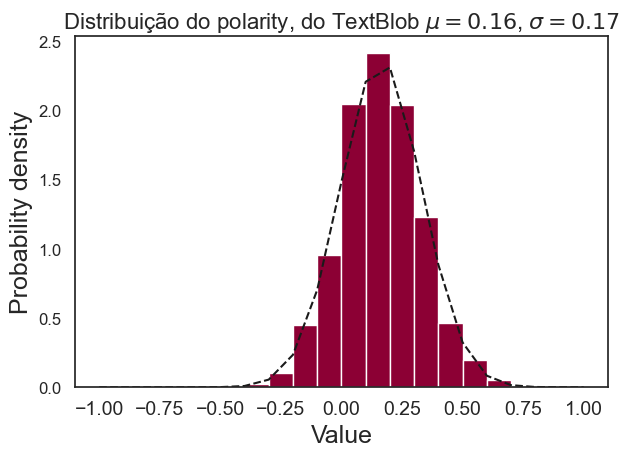

In [ ]:
fig, ax = plt.subplots()

# example data
polarity = df.polarity_blob.values
mean = polarity.mean()  # mean of distribution
std = np.std(polarity)  # standard deviation of distribution

n_bins = 20

# the histogram of the data
n, bins, patches = ax.hist(polarity, n_bins, density=True, color='#8c0034')

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (bins - mean))**2))
ax.plot(bins, y, '--', color='k')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Distribuição do polarity, do TextBlob '
             fr'$\mu={mean:.2f}$, $\sigma={std:.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


##### 4.1.2. Verificando novamente a distribuição dos pontos

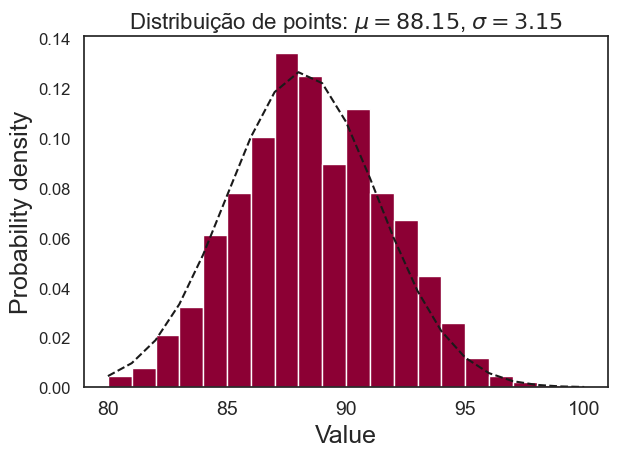

In [ ]:
fig, ax = plt.subplots()

# example data
points = df.points.values
mean = points.mean()  # mean of distribution
std = np.std(points)  # standard deviation of distribution

n_bins = 20

# the histogram of the data
n, bins, patches = ax.hist(points, n_bins, density=True, color='#8c0034')

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (bins - mean))**2))
ax.plot(bins, y, '--', color='k')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Distribuição de points: '
             fr'$\mu={mean:.2f}$, $\sigma={std:.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [ ]:
points = df.points.values
polarity = df.polarity_blob.values
subjectivity = df.subjectivity_blob.values

In [ ]:
df['polarity_int'] = round(df.polarity_blob * 10, 0)

In [ ]:
data = pd.DataFrame(df.points.unique(), columns=['points'])

In [ ]:
df.polarity_blob = df.polarity_blob + 1

In [ ]:
corr_blob = df[['points', 'price', 'polarity_blob', 'subjectivity_blob']].corr()

In [ ]:
corr_blob

points     price  polarity_blob  subjectivity_blob
points             1.000000  0.437456       0.178145           0.103657
price              0.437456  1.000000       0.005649           0.039635
polarity_blob      0.178145  0.005649       1.000000           0.468119
subjectivity_blob  0.103657  0.039635       0.468119           1.000000

##### 4.1.3. Visualizando a correlação das variáveis do TextBlob

<Axes: >

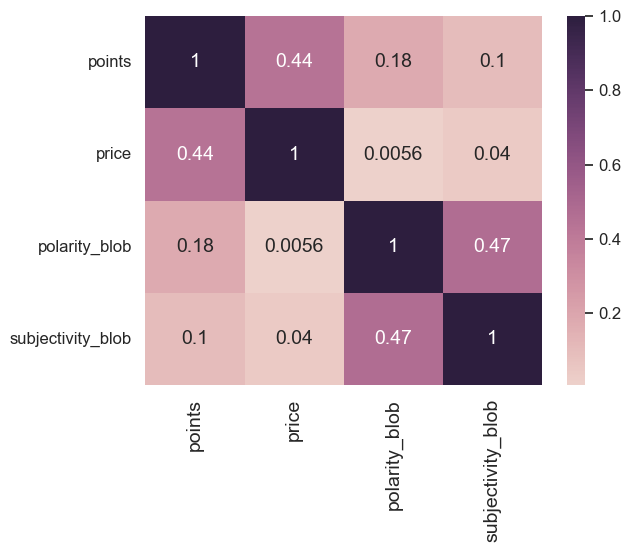

In [ ]:
sns.heatmap(corr_blob, cmap=sns.cubehelix_palette(as_cmap=True), annot=True,)

#### 4.2 Análise com VaderSentiment

In [22]:
analyzer = SentimentIntensityAnalyzer()

df['pos_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['neg_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['neu_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['comp_vader'] = df.description.apply(lambda x: analyzer.polarity_scores(x)['compound'])

##### 4.2.1. Visualizando distribuição do 'compound'

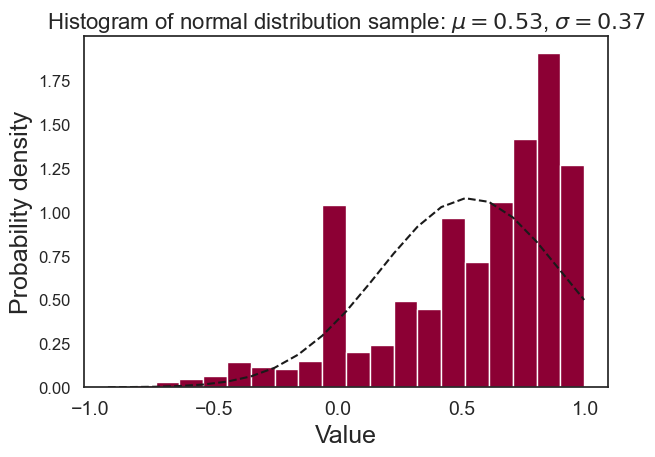

In [ ]:
fig, ax = plt.subplots()

# example data
comp = df.comp_vader.values
mean = comp.mean()  # mean of distribution
std = np.std(comp)  # standard deviation of distribution

n_bins = 20

# the histogram of the data
n, bins, patches = ax.hist(comp, n_bins, density=True, color='#8c0034')

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * (bins - mean))**2))
ax.plot(bins, y, '--', color='k')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mean:.2f}$, $\sigma={std:.2f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

##### 4.2.2. Visualizando correlação entre 'points', 'price' e as variáveis do VaderSentiment

In [ ]:
corr_vader = df[['points', 'price', 'pos_vader', 'neg_vader', 'neu_vader', 'comp_vader']].corr()

In [ ]:
corr_vader

points     price  pos_vader  neg_vader  neu_vader  comp_vader
points      1.000000  0.437456   0.173119  -0.202842  -0.103038    0.330914
price       0.437456  1.000000   0.021685  -0.021589  -0.014128    0.079014
pos_vader   0.173119  0.021685   1.000000  -0.190889  -0.938961    0.825181
neg_vader  -0.202842 -0.021589  -0.190889   1.000000  -0.158453   -0.491857
neu_vader  -0.103038 -0.014128  -0.938961  -0.158453   1.000000   -0.657643
comp_vader  0.330914  0.079014   0.825181  -0.491857  -0.657643    1.000000

<Axes: >

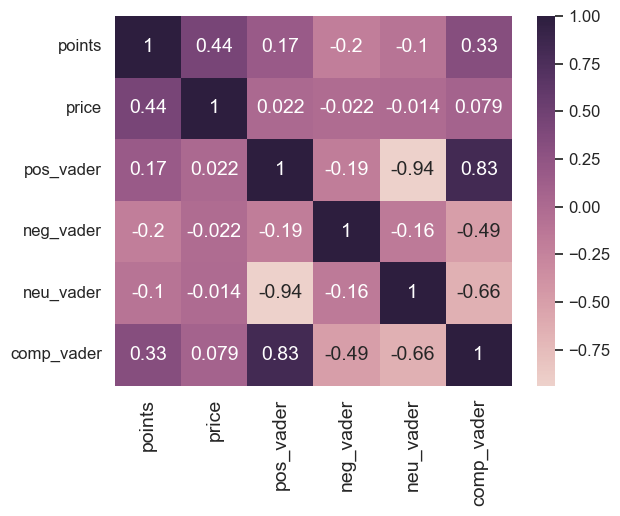

In [ ]:
sns.heatmap(corr_vader, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

##### 4.2.3. Plotando "compound" e "negative" vs "points", respectivamente

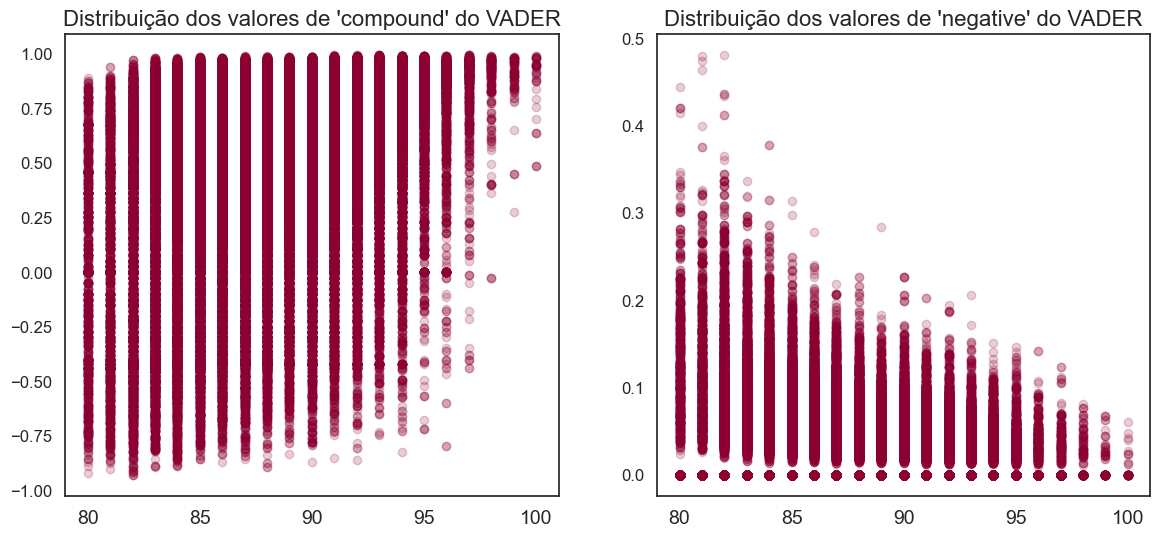

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

points = df.points.values
comp = df.comp_vader.values
neg = df.neg_vader.values

ax[0].scatter(x=points, y=comp, alpha=0.2, c='#8c0034')
ax[1].scatter(x=points, y=neg, alpha=0.2, c='#8c0034')

ax[0].set_title("""Distribuição dos valores de 'compound' do VADER""")
ax[1].set_title("""Distribuição dos valores de 'negative' do VADER""")

plt.show()

Repare que, por mais que o 'compound' apresente uma maior correlação com 'points' o 'negative' apresenta o limite superior inversamente correlacionado.

Talvez a gente consiga extrair alguma coisa disso

##### 4.2.4. Plotando a relação entre 'negative' e 'points' em diferentes quartis do 'negative'

21

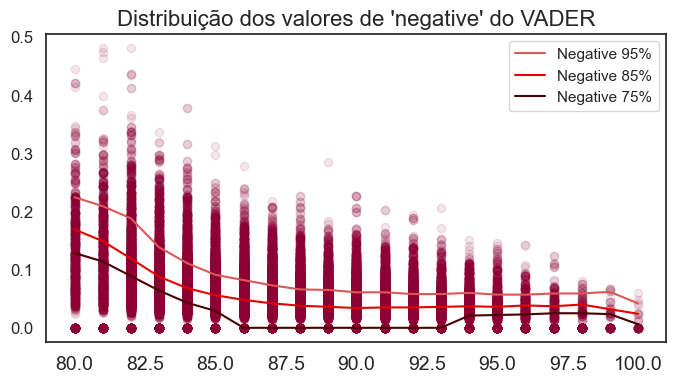

In [ ]:
def get_quantile(series, quantile):
    quantile_list = []
    
    for p in range(80, 101):
        n = df.loc[df.points == p, series].quantile(q=quantile, interpolation='linear')
        quantile_list.append(n)
    return quantile_list


fig, ax = plt.subplots(figsize=(8, 4))

x = df.points.sort_values().unique()

neg75 = get_quantile('neg_vader', 0.75)
neg85 = get_quantile('neg_vader', 0.85)
neg95 = get_quantile('neg_vader', 0.95)

ax.plot(x, neg95, label='Negative 95%', c='#db5856')
ax.plot(x, neg85, label='Negative 85%', c='#e50000')
ax.plot(x, neg75, label='Negative 75%', c='#4b0101')

neg = df.neg_vader.values

ax.scatter(x=points, y=neg, alpha=0.1, c='#8c0034')

ax.legend(loc='upper right')

ax.set_title("""Distribuição dos valores de 'negative' do VADER""")

len(x)

Existem MUITOS valores de negative iguais a zero e em todas as categorias

##### 4.2.5. Plotando a relação entre 'points' e as médias das variáveis de VaderSentiment

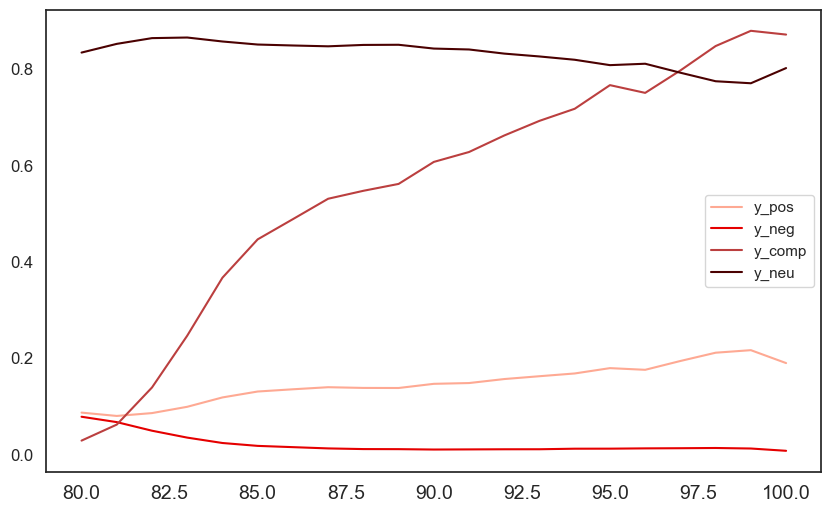

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

vader_means = df.groupby('points')[['comp_vader', 'neg_vader', 'pos_vader', 'neu_vader']].mean()
neg = df.neg_vader.quantile(q=0.75)
vader_means['neg75'] = neg


x = vader_means.index.values
y_comp = vader_means.comp_vader.values
y_neg = vader_means.neg_vader.values
y_pos = vader_means.pos_vader.values
y_neu = vader_means.neu_vader.values

plt.plot(x, y_pos, color='#fea993')
plt.plot(x, y_neg, color='#e50000')
plt.plot(x, y_comp, color='#bb3f3f')
plt.plot(x, y_neu, color='#4b0101')

plt.legend(labels=['y_pos', 'y_neg', 'y_comp', 'y_neu'])

plt.show()

In [ ]:
temp = df[['description', 'comp_vader', 'points']].sample(10)

In [ ]:
for i in temp.index:
    print(temp.loc[i, 'description'])
    print(temp.loc[i, 'points'])
    print(temp.loc[i, 'comp_vader'])
    print("")

a decent everyday chard, with ripe flavors of pineapples, peaches and pears, and an oaky influence of vanilla and buttercream.
84
0.0

from four acclaimed mendocino county vineyards, winemaker jon grant's straight line pinot is heftier than his single-vineyard bottlings from sister label couloir. a dense style of pinot, this has smoke and oak to it, plenty of strawberry and plum, its tannins not resolved, yet it still exhibits a lush fullness and well-rounded elegance.
89
0.5396

this basic wine that has earthy aromas, slightly pruney flavors and a smooth-enough texture.
81
0.0

done in a medium-dry style, this shows petrol, lime pith, lime blossoms and wet cement on the nose. the palate is rich with squeezed lemon juice, shaved citrus ice, ripe pears and a stony grip that holds it all together.
89
0.5574

you'll find the hard tannins associated with diamond creek's cabs, as well as an iodine, metallic brittleness to this wine. the combination of the two makes this as tough as any youn

##### 4.2.6. Criando variável binária de 'compound'

In [23]:
df['comp_resumo'] = df.comp_vader.apply(lambda x: 1 if x >= 0.5 else 0)

Plotando o comportamento da nova variável em relação a 'points'

<AxesSubplot:xlabel='points', ylabel='Count'>

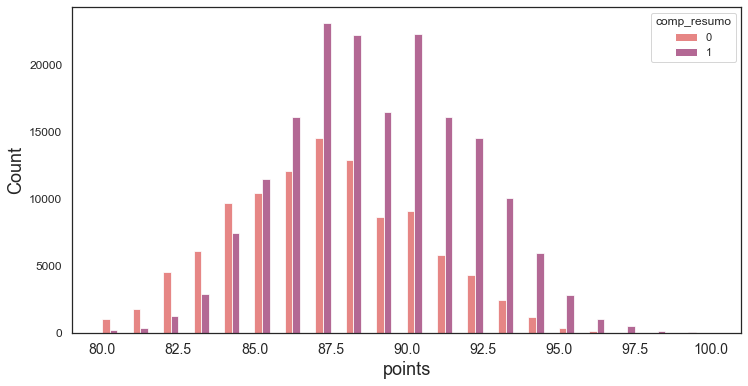

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='points', hue='comp_resumo', multiple='dodge', palette='flare', binwidth=0.5)

Percebe-se uma relação relevante entre a nova variável e os valores de 'points'